# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np  # 데이터 분석 기본 라이브러
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')  # white, dark, whitegrid, darkgrid, ticks
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The Age, Cabin and Embarked have null values I will try to fix them.

# How many Survived?

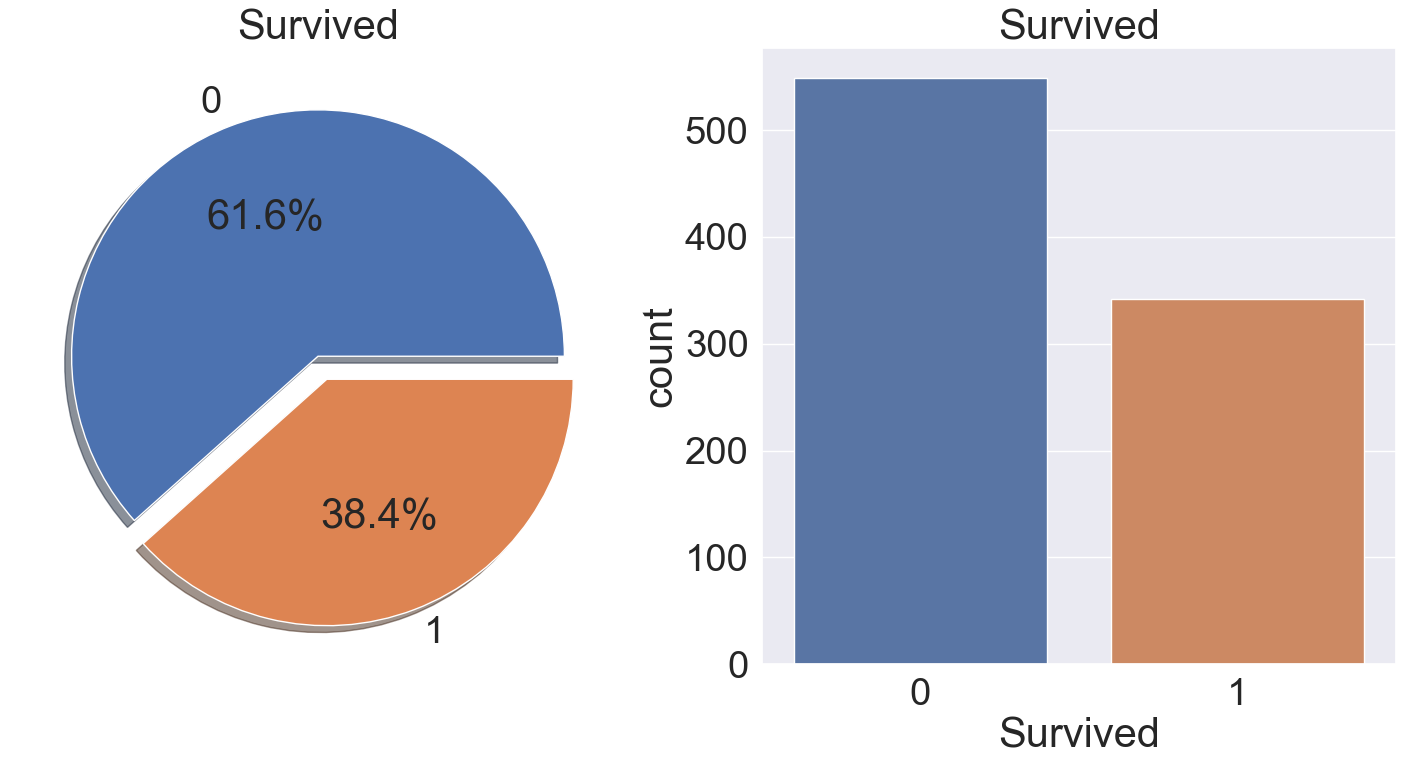

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot( data=data,x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [7]:
data['Survived'].value_counts() # value_counts를 쓰면 null카운트 수는 반환 안함

0    549
1    342
Name: Survived, dtype: int64

### 타입 Series는 메서드에 plot.을 가지고 있는데..
뒤에 hist, pie 등등으로 그림을 그릴수 있다
- type(data['Survived'].value_counts())--->Series
- data['Survived'].value_counts().plot.pie...

# Type of Feature
- Categorical Features : 순서가 없다. Sex, Embarked
- Ordinal Features : 순서가 있다. Pclass
- Continous Feature : Age -> bar를 이용하는게 좋다
- 이러한 차이에 따라 접근법이 달라진다

## Analysing The Features

### Sex --> Categorical Feature

In [8]:
data.groupby(['Sex', 'Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [9]:
data.groupby(['Sex', 'Survived', 'Pclass']).count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived Pclass                                                       
female 0        1                 3     3    3      3      3       3     3   
                2                 6     6    6      6      6       6     6   
                3                72    72   55     72     72      72    72   
       1        1                91    91   82     91     91      91    91   
                2                70    70   68     70     70      70    70   
                3                72    72   47     72     72      72    72   
male   0        1                77    77   61     77     77      77    77   
                2                91    91   84     91     91      91    91   
                3               300   300  215    300    300     300   300   
       1        1                45    45   40     45     45      45    45   
                2                17    17   15     17     17      17    17   
                3                47    47   38     47     47      47    47   

                        Cabin  Embarked  
Sex    Survived Pclass                   
female 0        1           3         3  
                2           1         6  
                3           2        72  
       1        1          78        89  
                2           9        70  
                3           4        72  
male   0        1          56        77  
                2           2        91  
                3           4       300  
       1        1          39        45  
                2           4        17  
                3           2        47

In [10]:
data.groupby(['Sex', 'Survived']).max()

PassengerId  Pclass  \
Sex    Survived                        
female 0                 889       3   
       1                 888       3   
male   0                 891       3   
       1                 890       3   

                                                         Name   Age  SibSp  \
Sex    Survived                                                              
female 0                                Zabour, Miss. Thamine  57.0      8   
       1         de Messemaeker, Mrs. Guillaume Joseph (Emma)  63.0      4   
male   0                          van Melkebeke, Mr. Philemon  74.0      8   
       1                              de Mulder, Mr. Theodore  80.0      4   

                 Parch      Ticket      Fare  
Sex    Survived                               
female 0             6  W./C. 6609  151.5500  
       1             5   WE/P 5735  512.3292  
male   0             5   WE/P 5735  263.0000  
       1             2   SW/PP 751  512.3292

In [11]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
data[['Sex', 'Survived']].groupby(['Sex']).count()  # 의미 없다

,Survived
Sex,
female,314
male,577


In [13]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


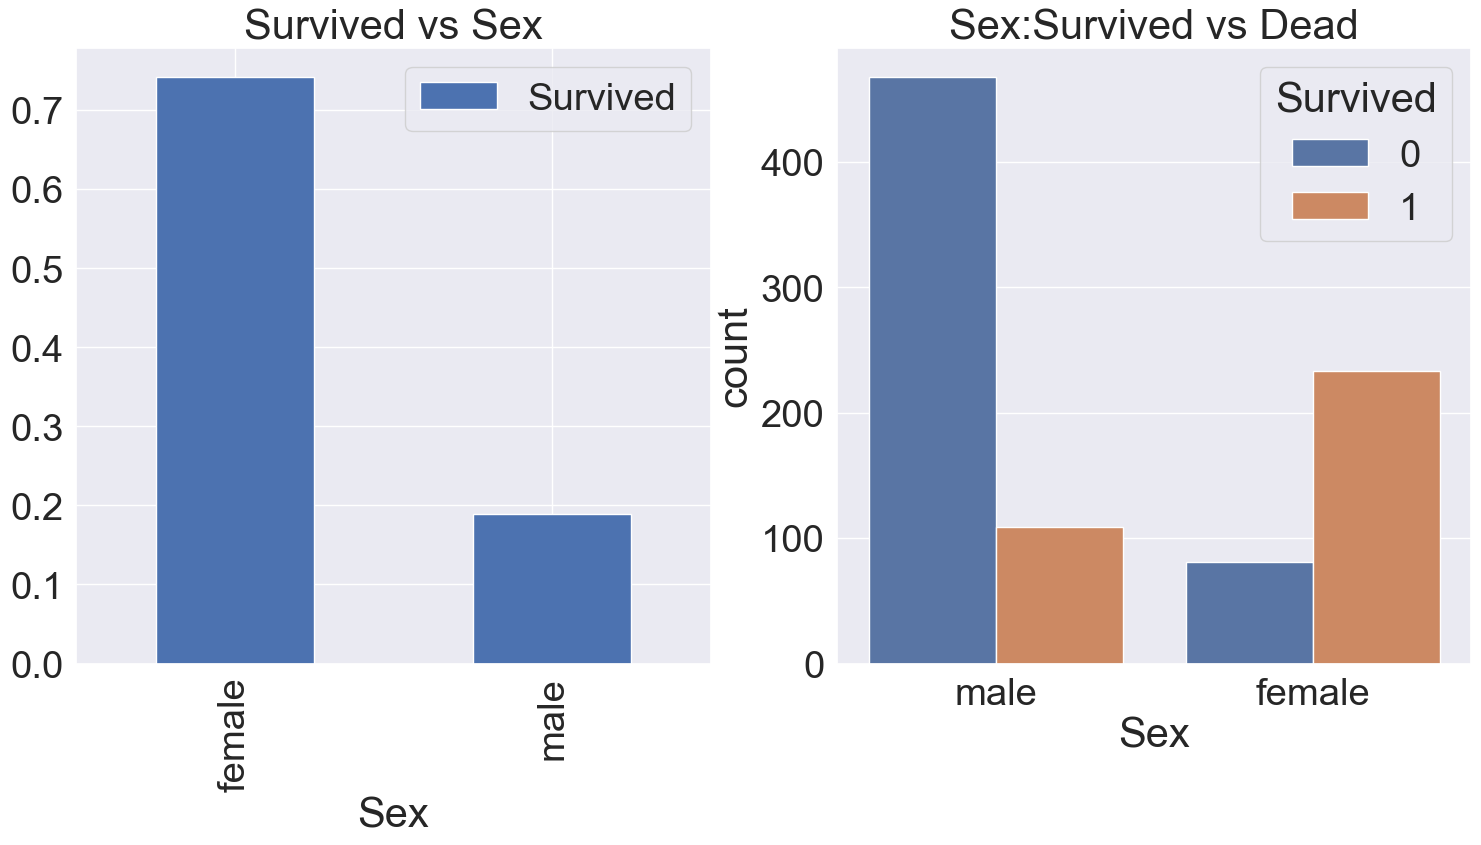

In [14]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data=data, x='Sex', hue='Survived',ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## Pclass--> Ordinal Feature

In [15]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


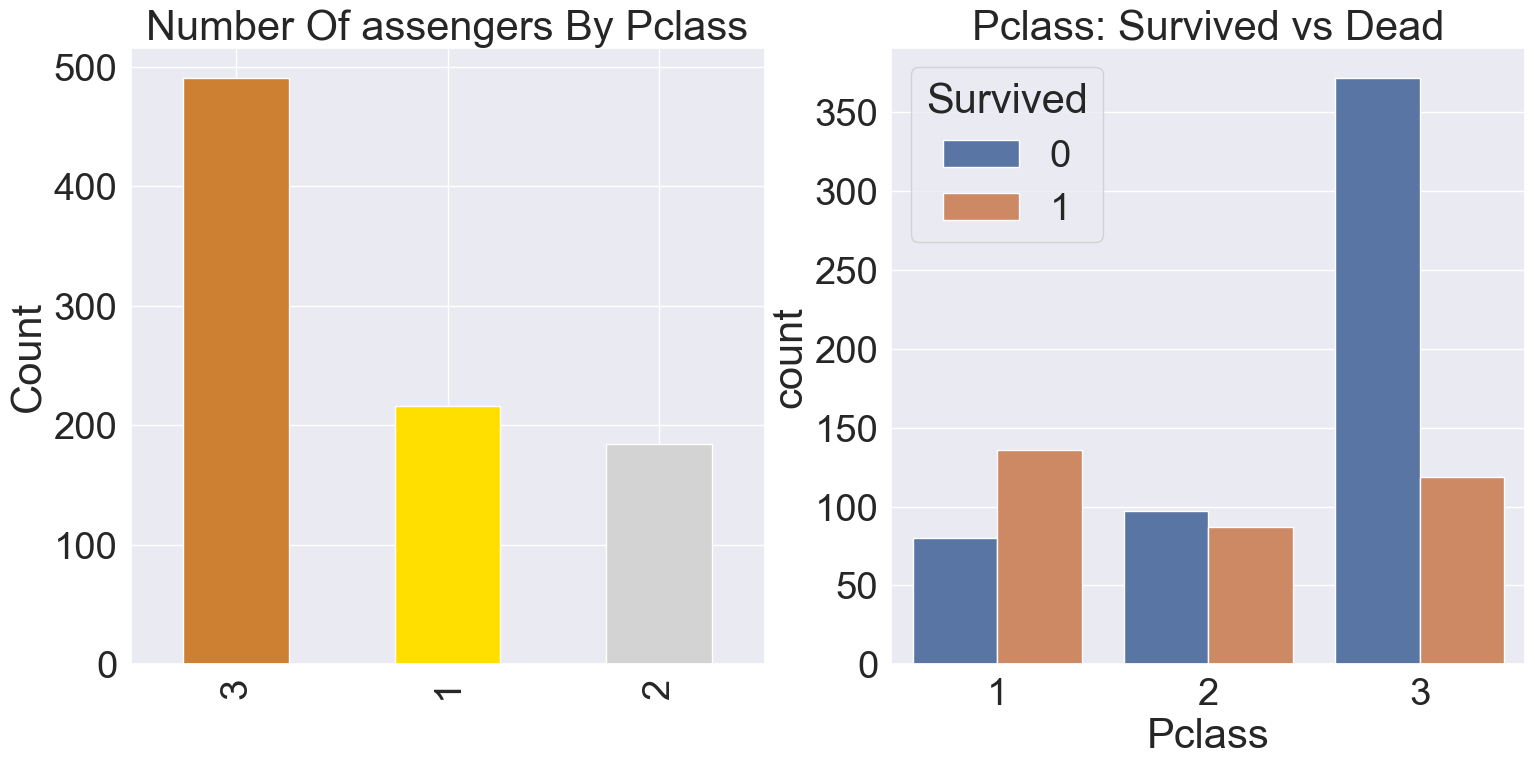

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of assengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(data=data, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [17]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

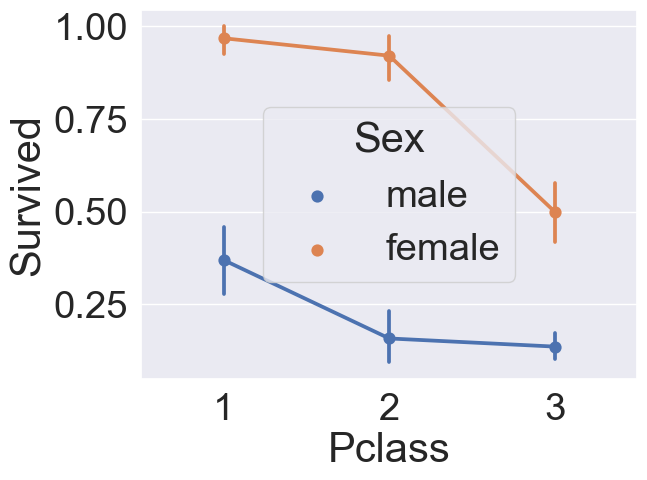

In [19]:
sns.pointplot(data=data, x='Pclass', y= 'Survived', hue='Sex')
plt.show()

## Age--> Continous Feature

In [20]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [21]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'count')

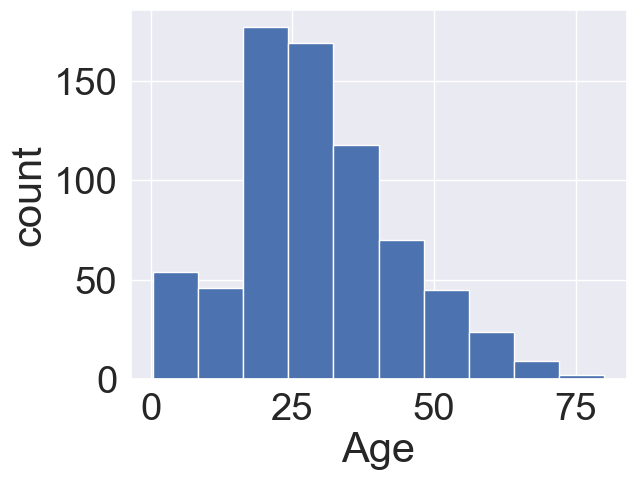

In [22]:
data['Age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('count')

# sns.kdeplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('count')

Text(0, 0.5, 'count')

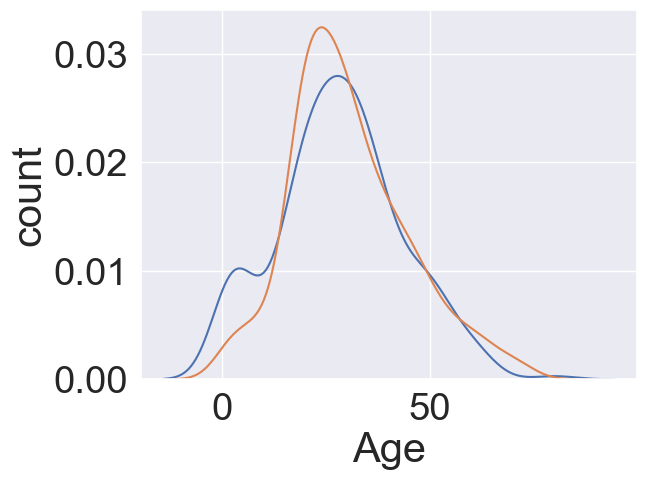

In [23]:
sns.kdeplot(data.loc[data['Survived'] == 1, 'Age']) # 나이에 따른 생존 여부
sns.kdeplot(data.loc[data['Survived'] == 0, 'Age'])
plt.xlabel('Age')
plt.ylabel('count')

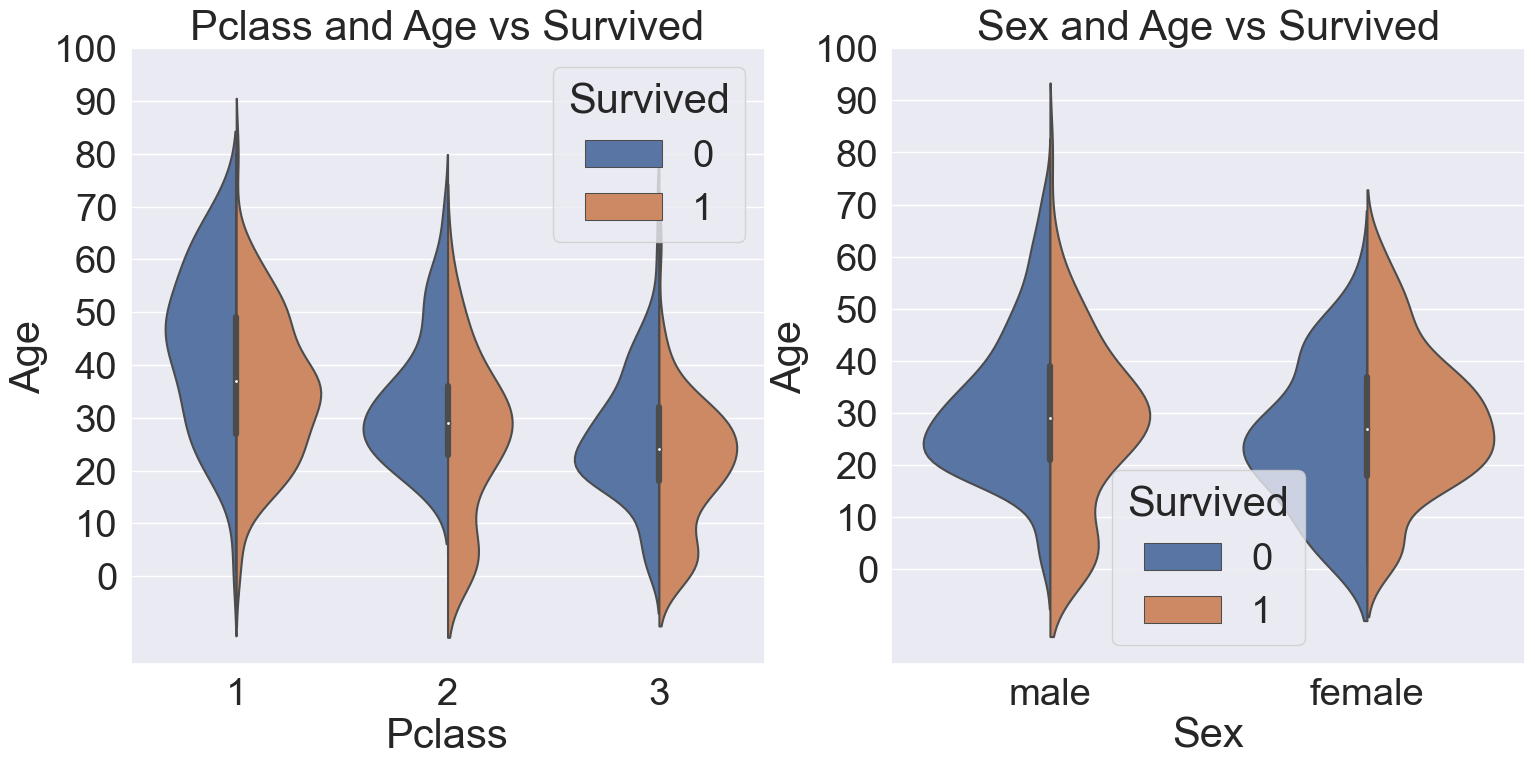

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(data=data, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [25]:
data['Initial'] = 0

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [27]:
data['Initial']=0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')    

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [29]:
data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [30]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [31]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
                        ,['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [32]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Filling NaN Ages

In [33]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [34]:
data.Age.isnull().any()

False

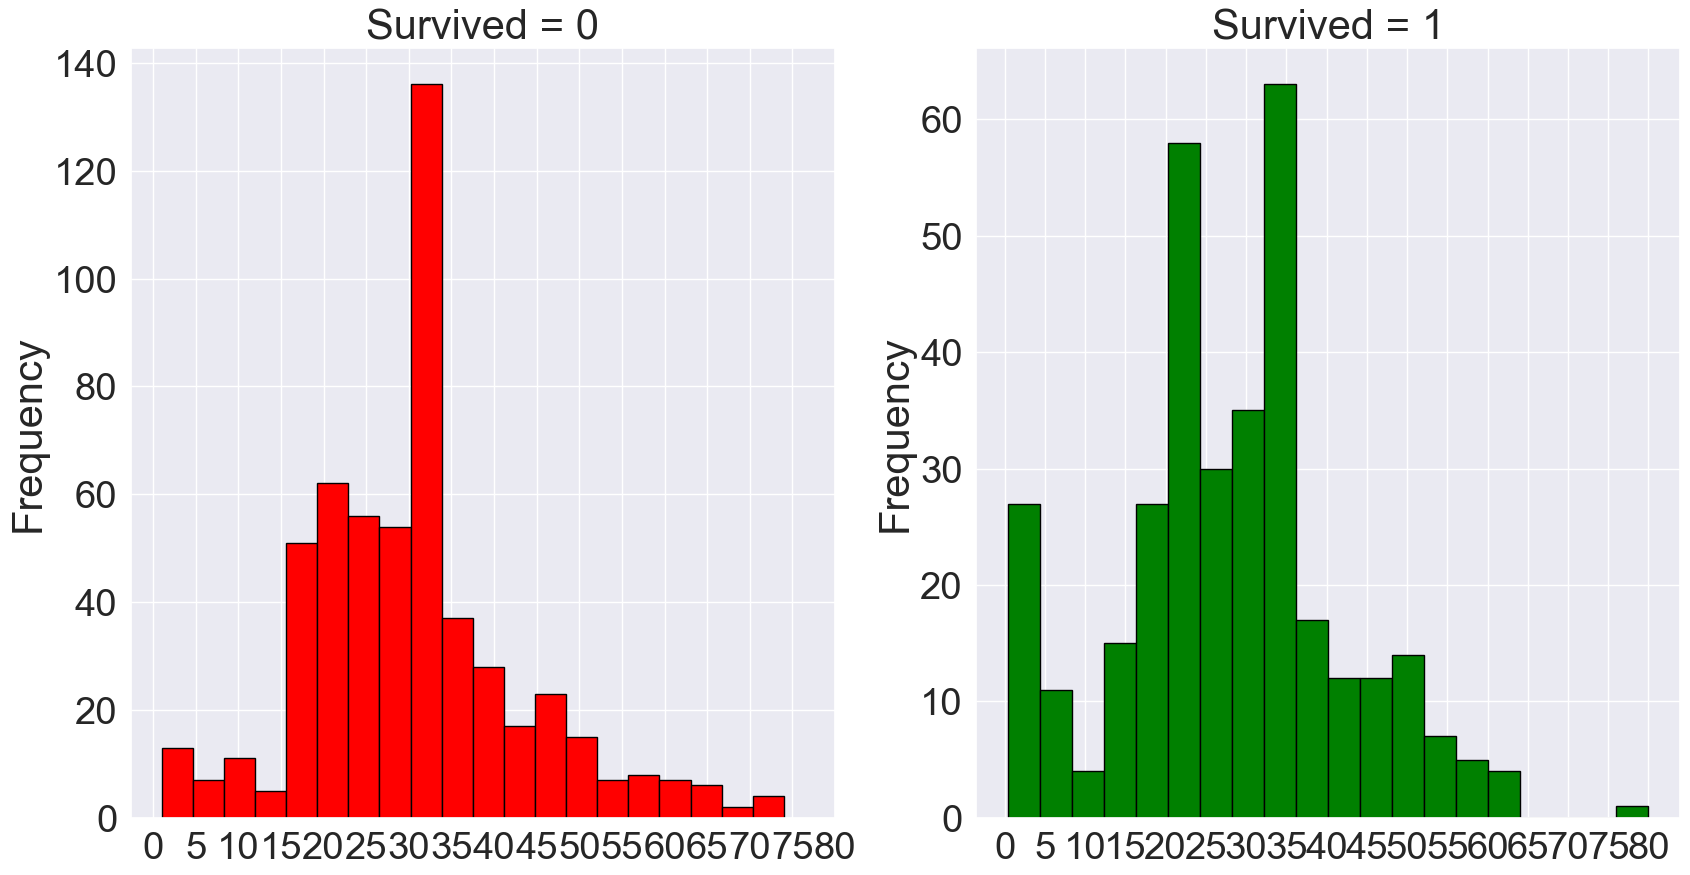

In [35]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

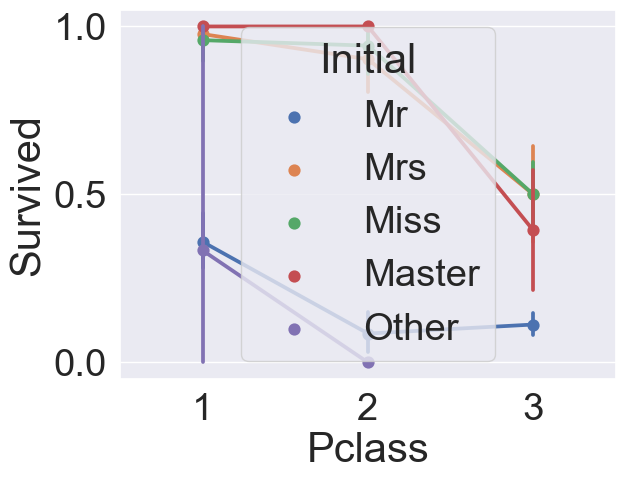

In [36]:
sns.pointplot(data=data, x='Pclass', y='Survived', hue='Initial')
plt.show()

## Embarked --> Categorical Value

In [37]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

## Chances for Survival by Port Of Embarkation

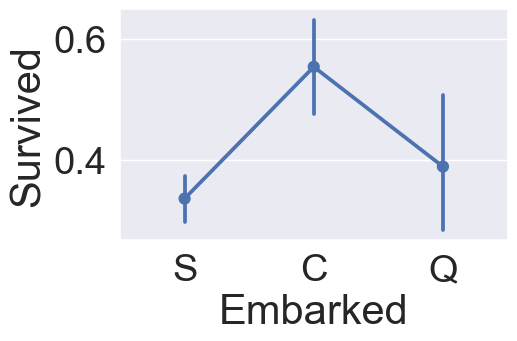

In [38]:
sns.pointplot(data=data, x='Embarked', y='Survived')
fig = plt.gcf()  # plt.gcf() 함수는 현재 그래프를 불러옴. 이 그래프를 fig 변수에 할당..이렇게 함으로써 그래프의 속성을 수정할 수 있게
fig.set_size_inches(5, 3)  #  그래프의 크기를 설정 : 가로 길이를 5인치, 세로 길이를 3인치로 설정
plt.show()

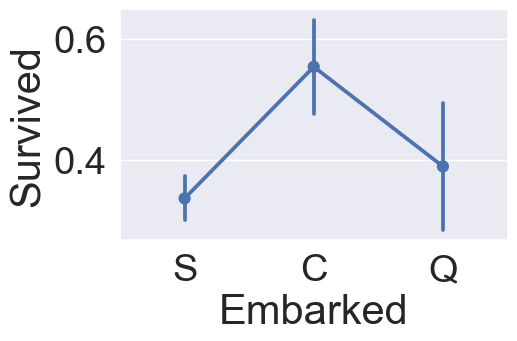

In [39]:
f, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.pointplot(data=data, x='Embarked', y='Survived')
plt.show()

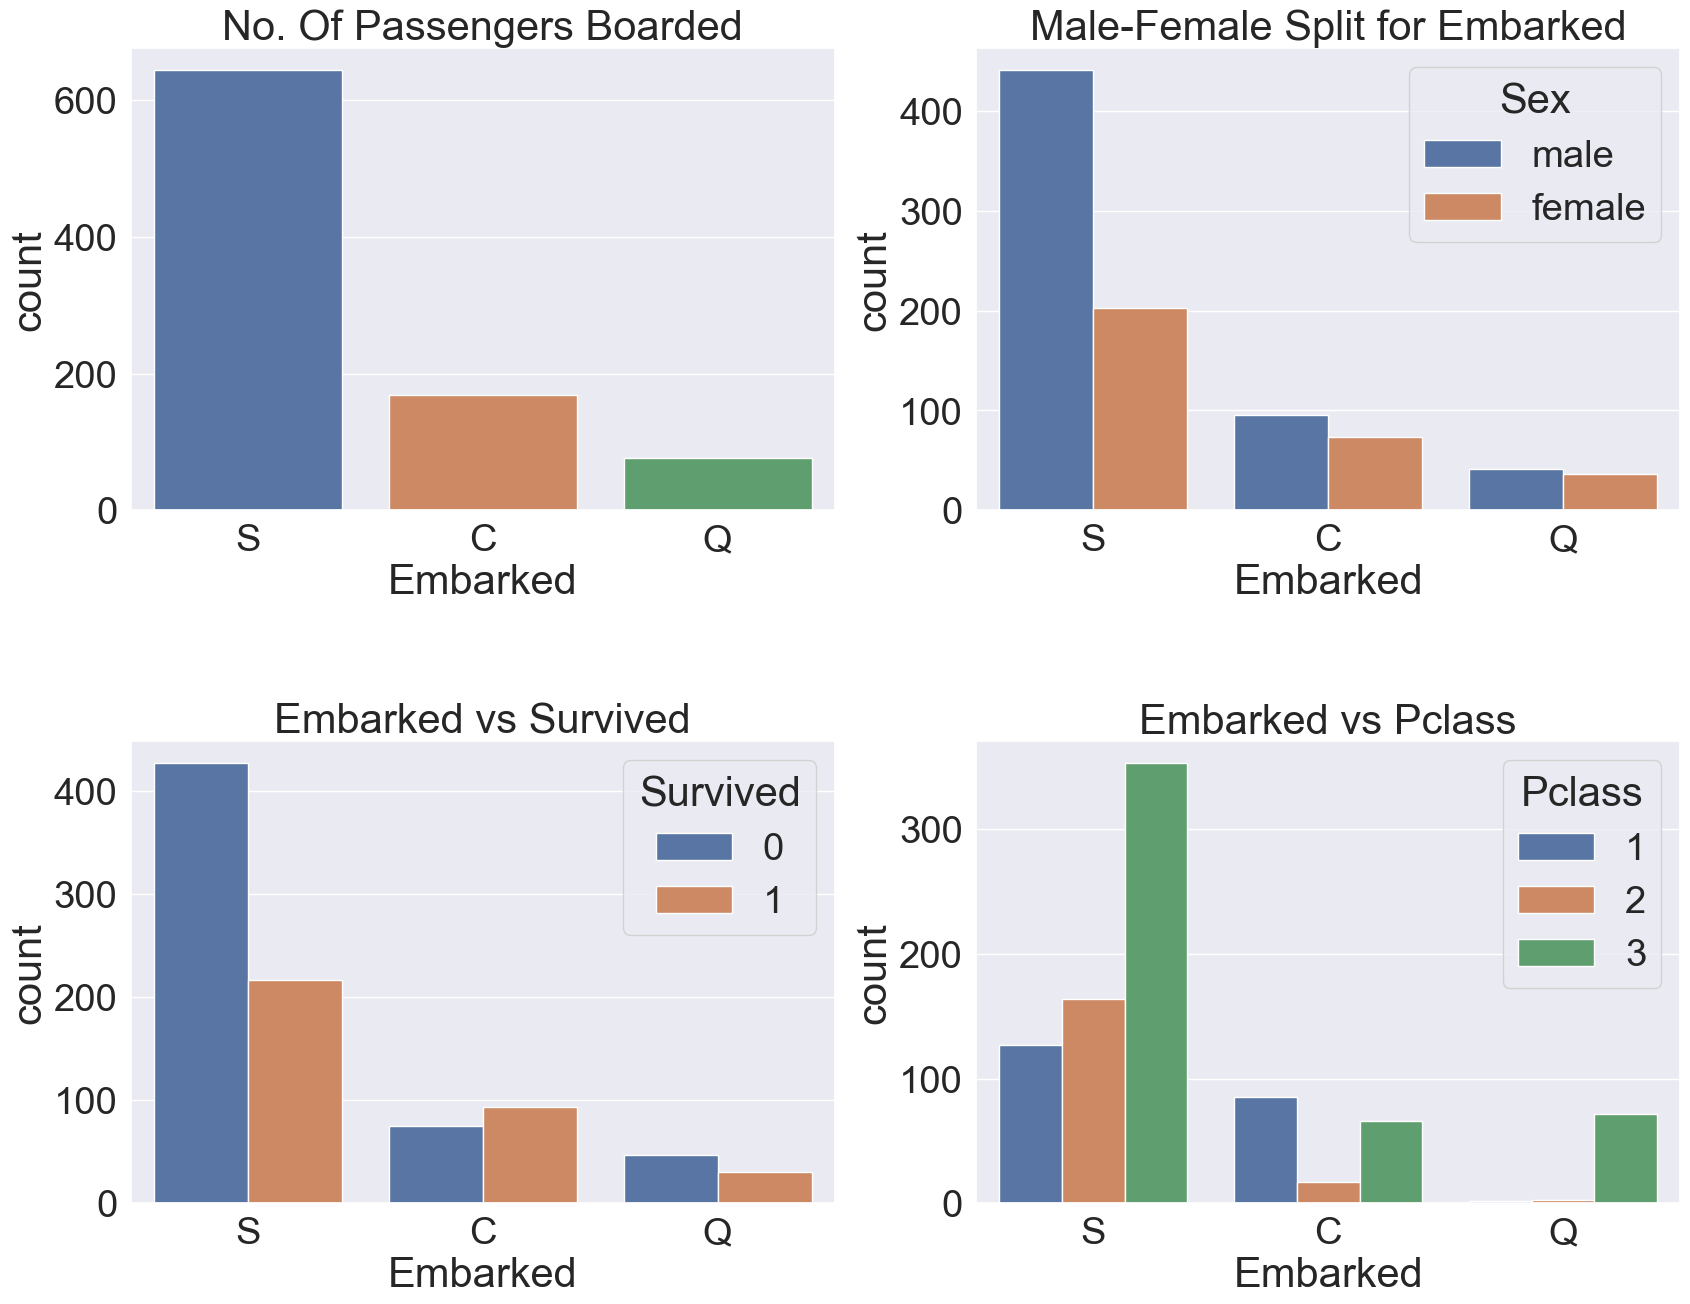

In [40]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(data= data, x='Embarked', ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot(data= data, x='Embarked',hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot(data= data, x='Embarked', hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot(data= data, x='Embarked',hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

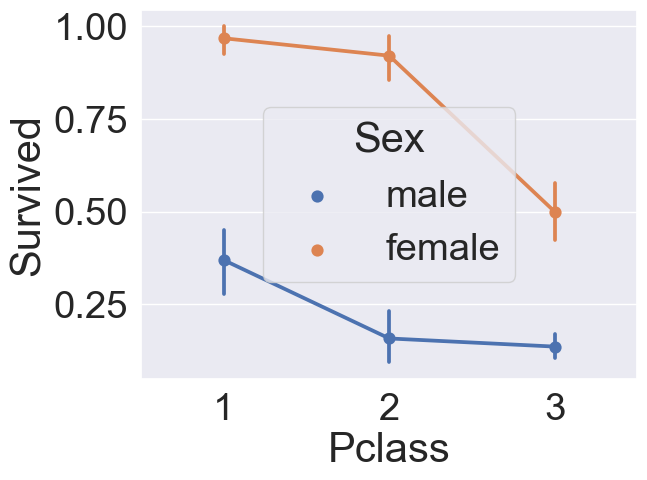

In [41]:
sns.pointplot(data=data, x='Pclass', y='Survived',hue='Sex')
plt.show()


## Filling Embarked NaN

In [42]:
data['Embarked'].fillna('S', inplace=True)

In [43]:
data.Embarked.isnull().any()

False

## SibSp--> Discrete Feature

In [44]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


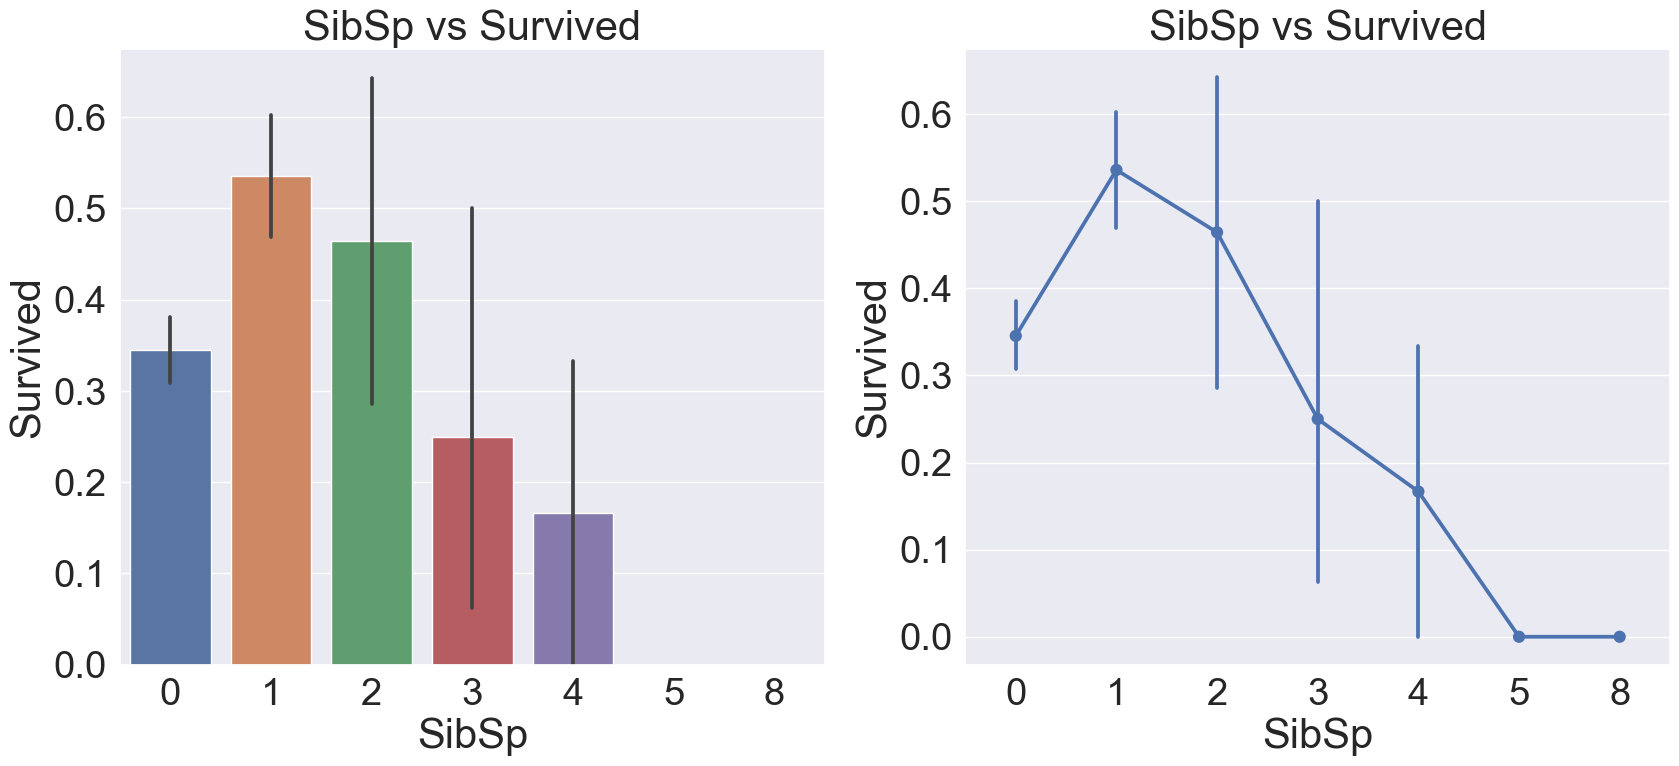

In [45]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(data=data, x='SibSp', y='Survived', ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(data=data, x='SibSp', y='Survived', ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [46]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## Parch

In [47]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


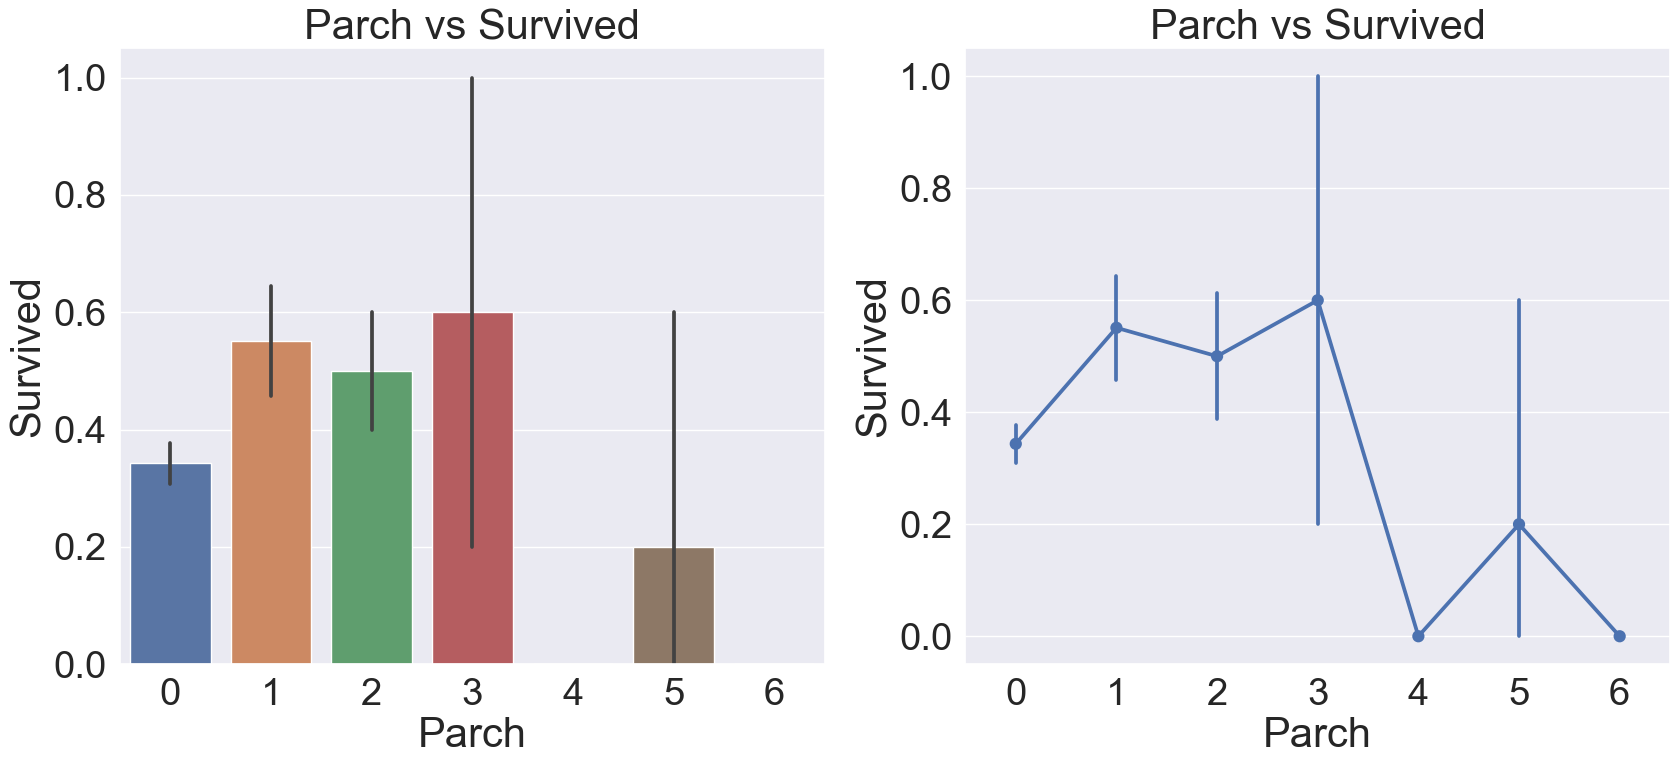

In [48]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(data=data, x='Parch', y='Survived', ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(data=data, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

## Fare--> Continous Feature

In [49]:
print('Highest Fare was : ', data['Fare'].max())
print('Lowest Fare was : ', data['Fare'].min())
print('Average Fare was : ', data['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.204207968574636


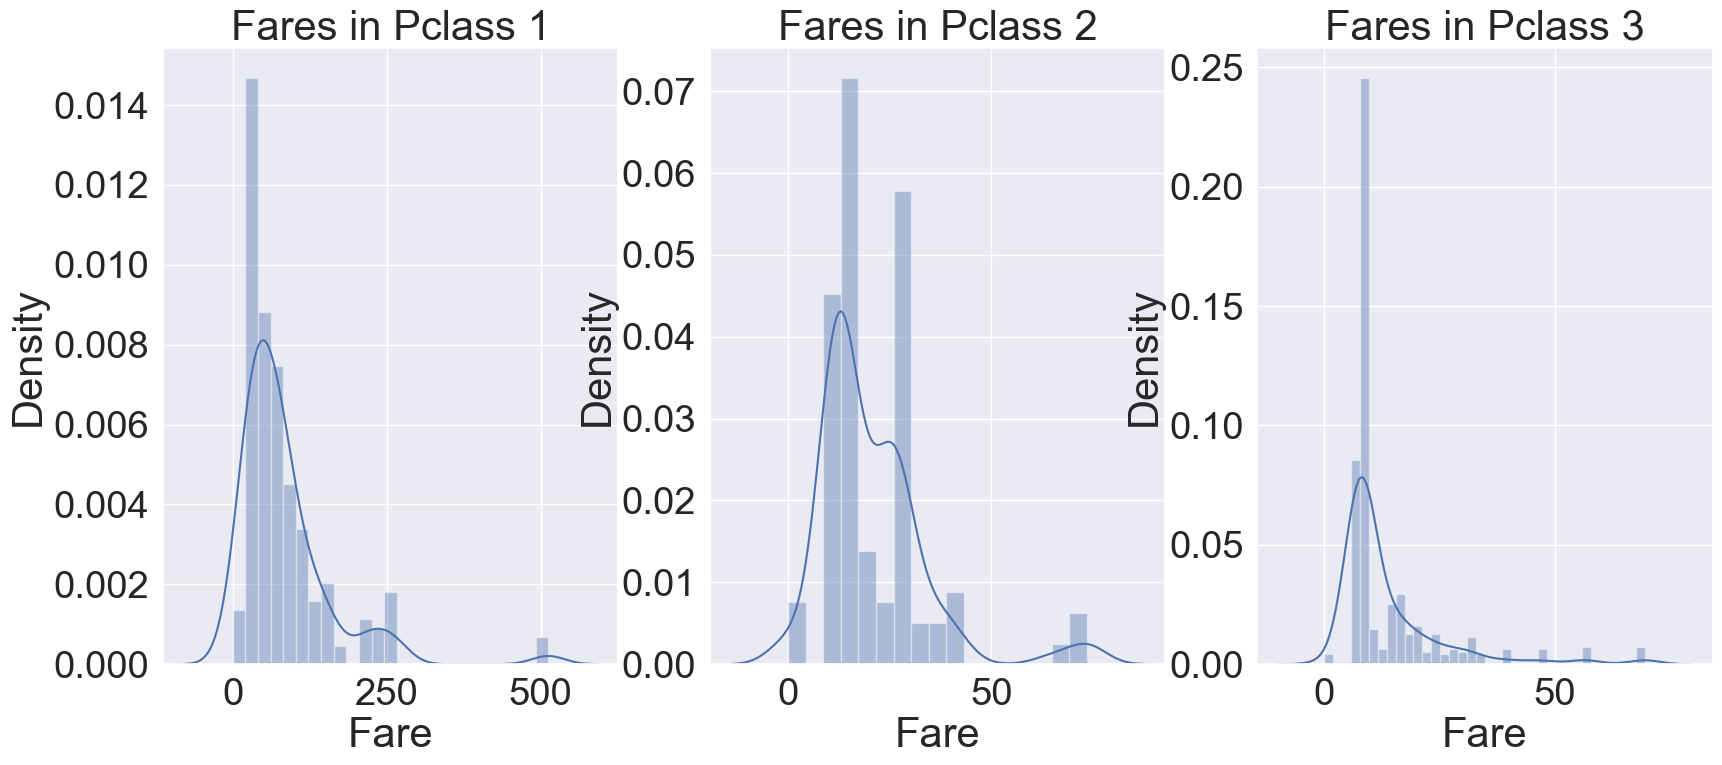

In [50]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [51]:
data[data['Pclass'] == 1].Fare.describe()

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64

In [52]:
data[data['Pclass'] == 2].Fare.describe()

count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64

In [53]:
data[data['Pclass'] == 3].Fare.describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

## Correlation Between The Features

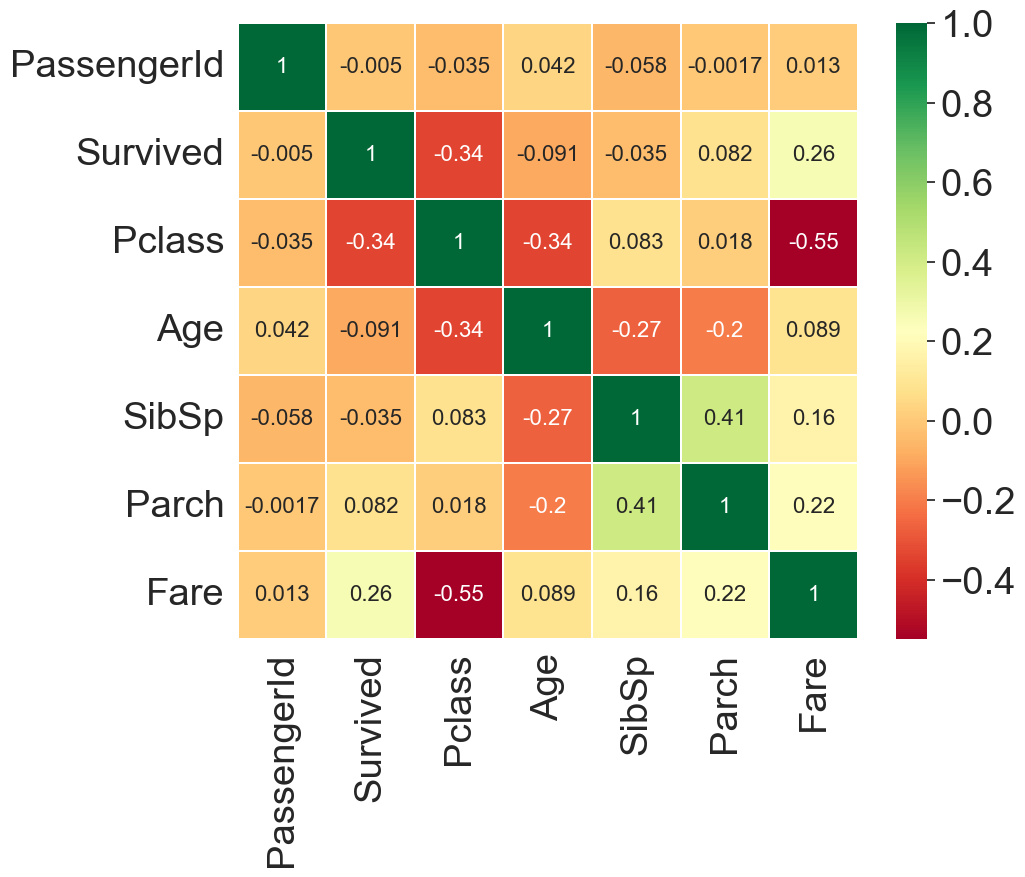

In [54]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 16})
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

<Axes: title={'center': 'Correlation Between The Features'}>

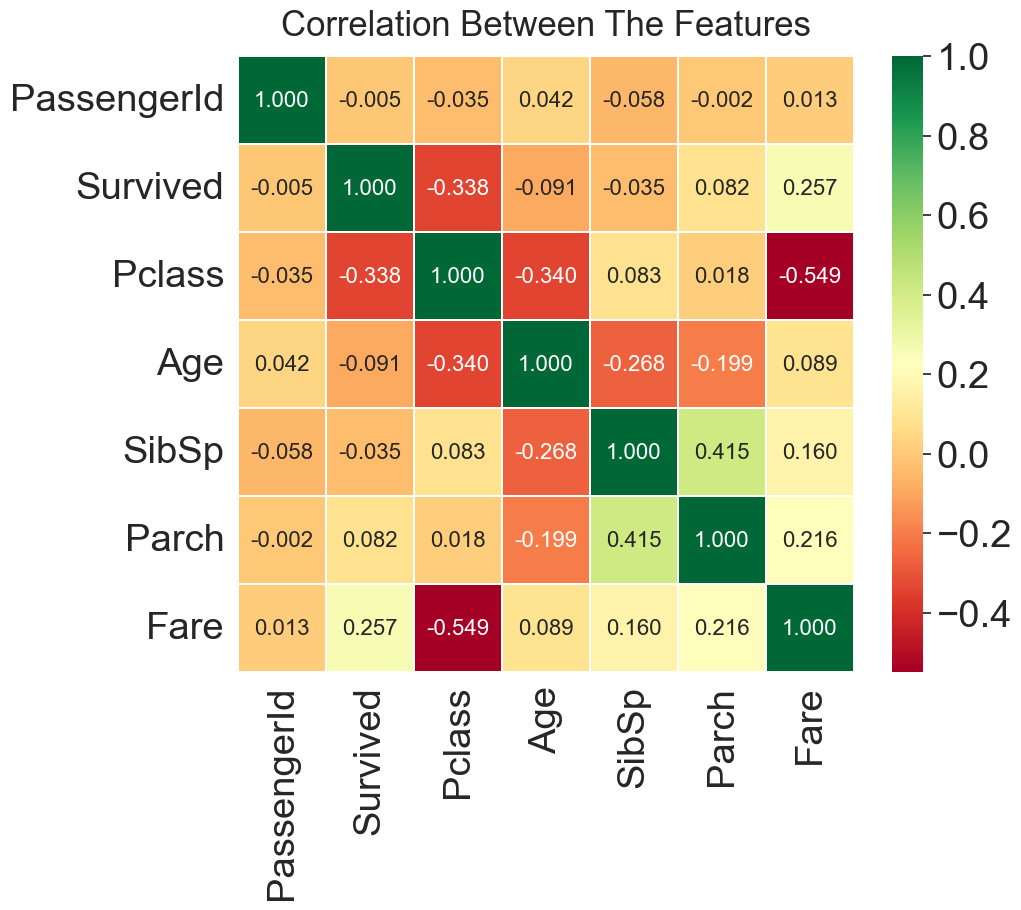

In [55]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Between The Features', y=1.02, size=25)
sns.heatmap(data.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap='RdYlGn', linecolor='white', annot=True, annot_kws={'size': 16}, fmt='.3f')

# Part2 : Feature Engineering and Data Cleaning

In [56]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [57]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


<Axes: xlabel='Age_band', ylabel='Survived'>

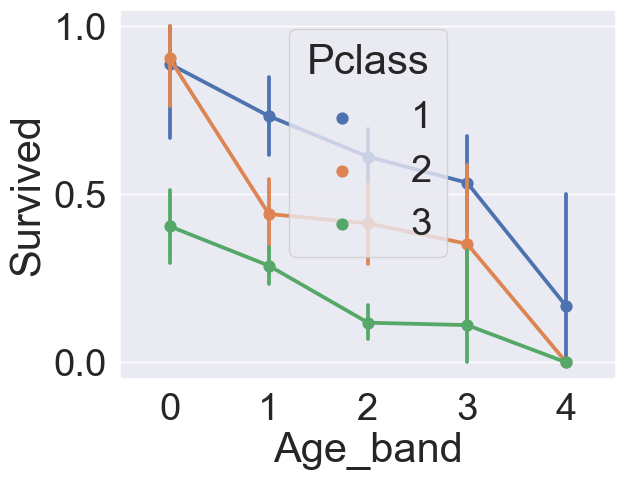

In [58]:
sns.pointplot(data=data, x='Age_band', y='Survived', hue='Pclass')

## Family_Size and Alone

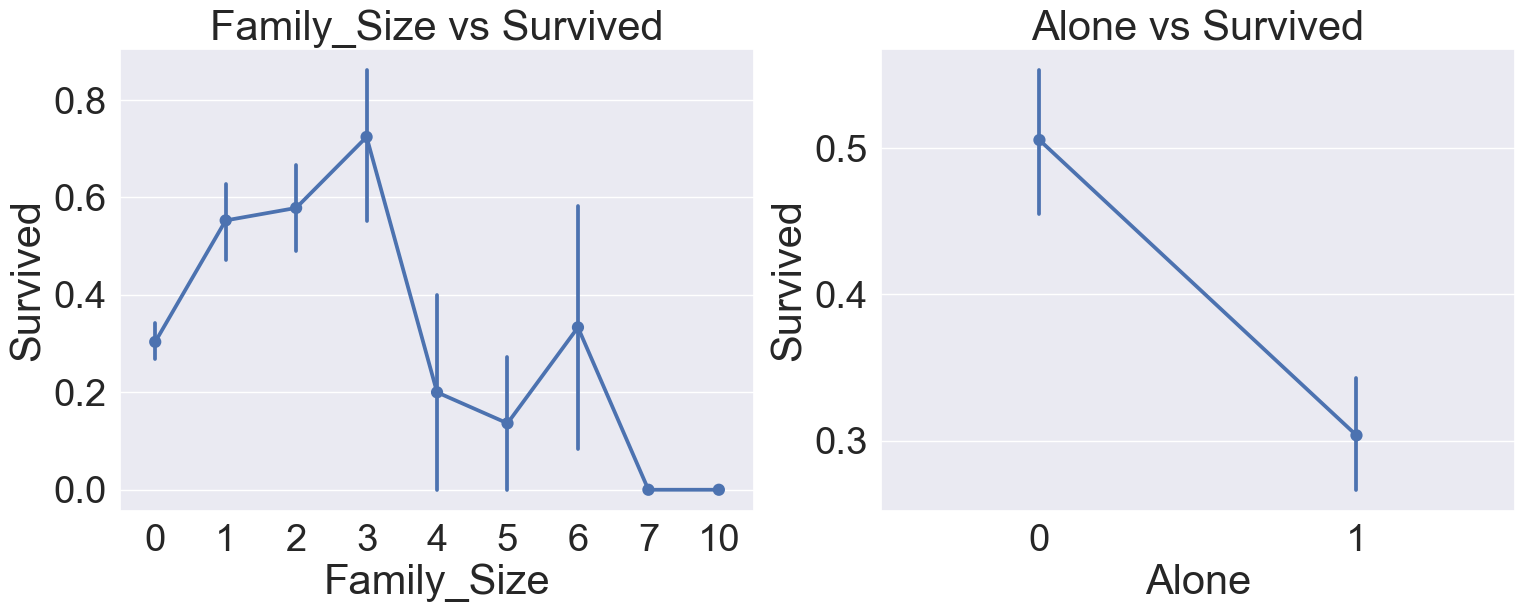

In [59]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot(data=data, x='Family_Size', y='Survived', ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(data=data, x='Alone', y='Survived', ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

In [60]:
data['Alone'].sum()

537

In [61]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


<Axes: xlabel='Alone', ylabel='Survived'>

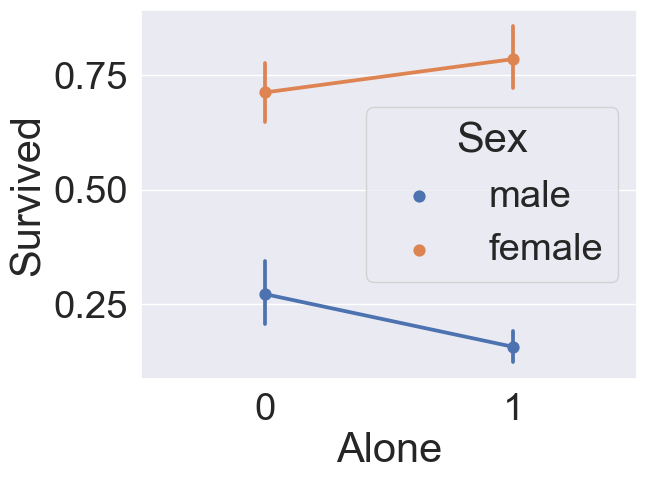

In [62]:
sns.pointplot(data=data, x='Alone', y='Survived', hue='Sex')

<Axes: xlabel='Pclass', ylabel='Survived'>

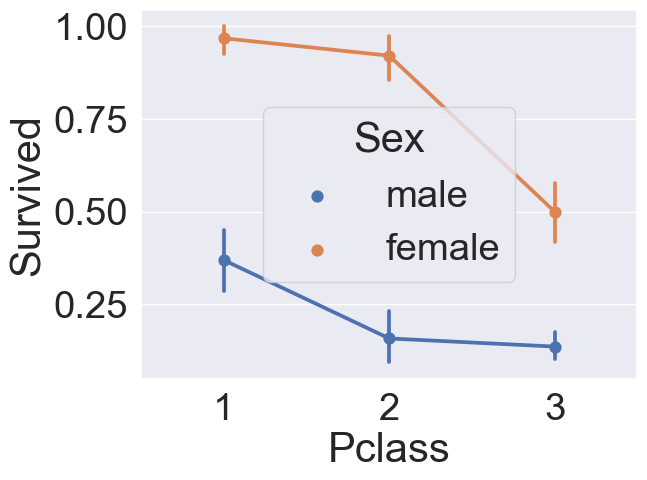

In [63]:
sns.pointplot(data=data, x='Pclass', y='Survived', hue='Sex')

## Fare_Range

In [64]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data[['Fare_Range', 'Survived']].groupby('Fare_Range')['Survived'].mean()

Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [65]:
data[['Fare_Range', 'Survived']].groupby('Fare_Range')['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [66]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

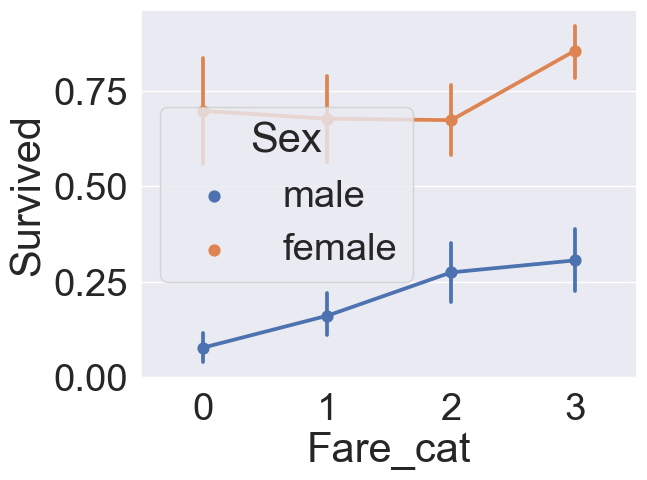

In [67]:
sns.pointplot(data=data, x='Fare_cat', y='Survived', hue='Sex')
plt.show()

## Converting String Values into Numeric

In [68]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

- 아래 방식은 위의 것과 결과가 같다

In [69]:
from sklearn.preprocessing import LabelEncoder
for col in ['Sex', 'Embarked', 'Initial']:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

In [70]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


## Dropping UnNeeded Features

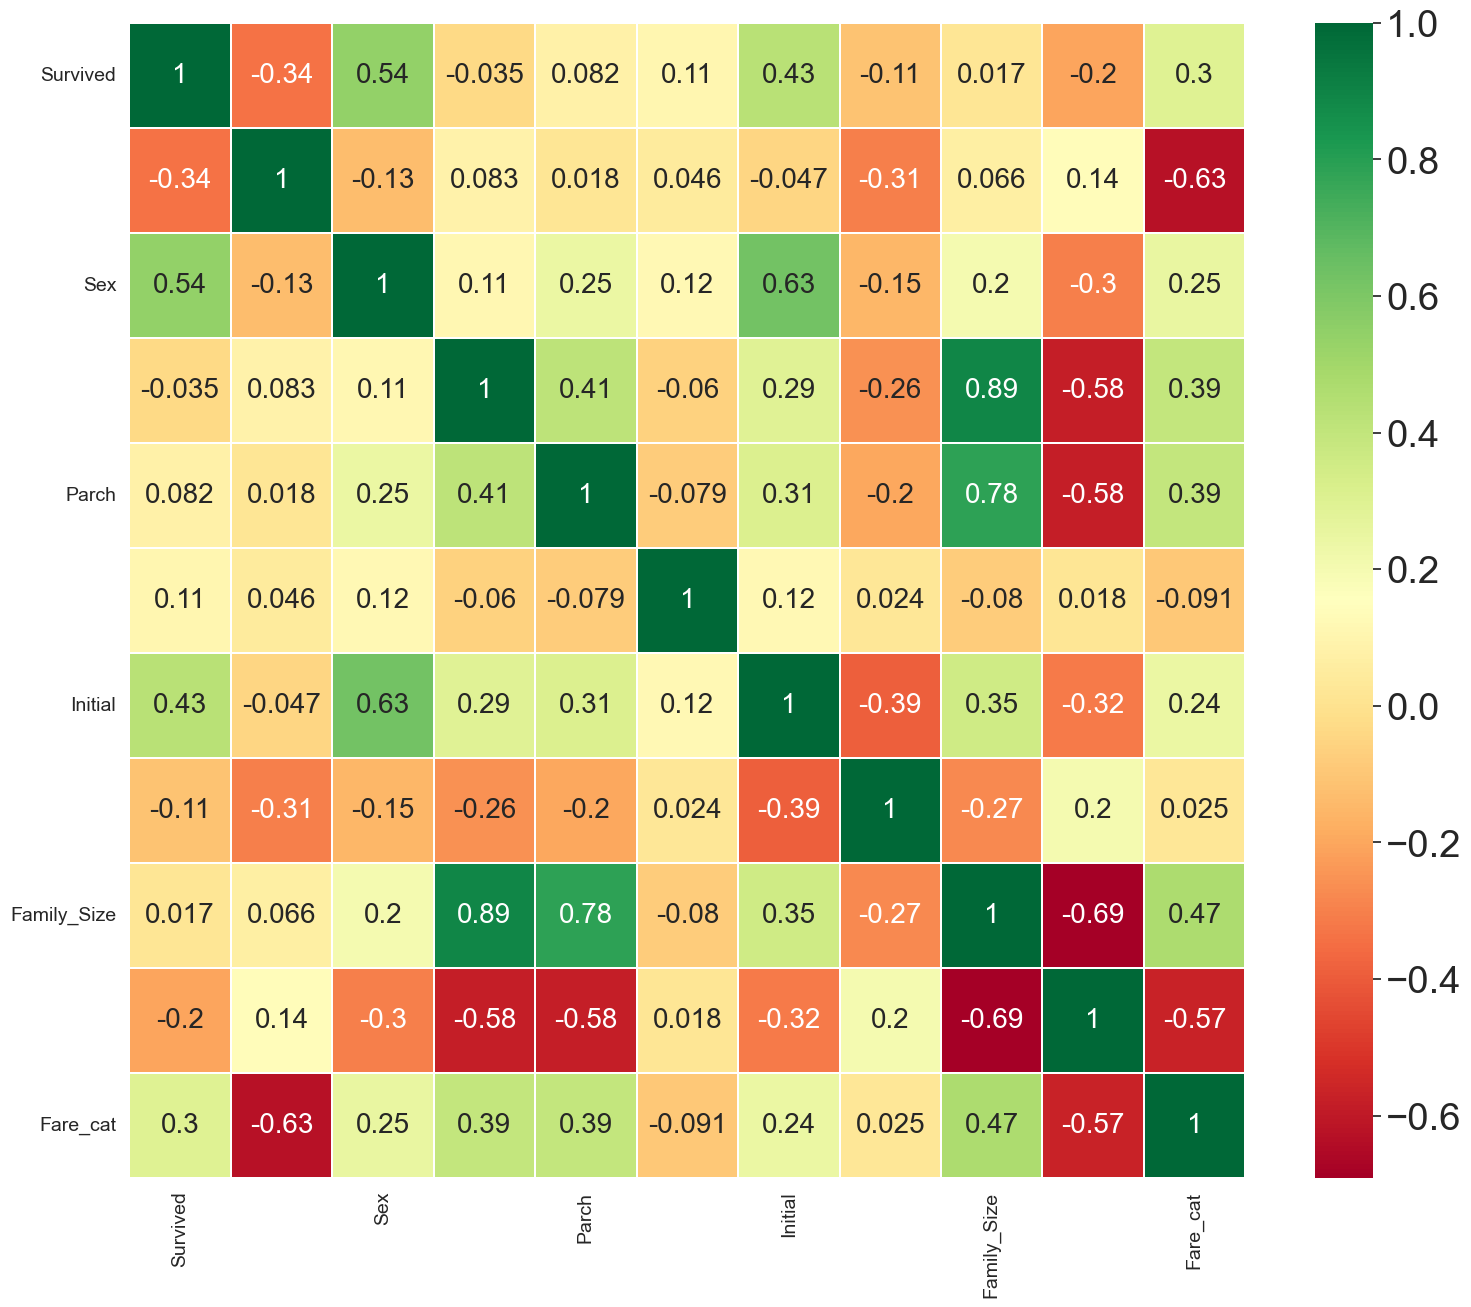

In [71]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3 : Predictive Modeling
- 임모피프

1)Logistic Regression : 선그어서 아래 있냐 위에 있냐 

2)Support Vector Machines(Linear and radial): 하이퍼플레인을 만들어서 ....
 SVM은 두 클래스(또는 그 이상)를 구분하는 경계를 찾는 데 초점
 
 선형 SVM:
선형 SVM은 두 개의 클래스를 구분하는 선형 경계를 찾는 알고리즘입니다. 이때 경계는 데이터 공간에서 클래스 간의 최대 마진(거리)을 가지는 결정 경계입니다. 즉, 클래스들 사이의 간격이 최대화되도록 경계를 찾아내는 것이 목표입니다. 이렇게 최대 마진을 가지는 경계를 찾는 것으로 인해 SVM은 다른 알고리즘들보다 더 좋은 일반화 성능을 가질 수 있습니다.

 방사 기저 함수 (Radial Basis Function) SVM:
방사 기저 함수 SVM은 선형으로 구분하기 어려운 복잡한 데이터를 처리하는 데 사용됩니다. 이는 데이터를 고차원 특징 공간으로 변환하여 선형 분리 가능한 형태로 만드는 기법입니다. 데이터 포인트들을 더 높은 차원으로 매핑함으로써 복잡한 패턴이 선형적으로 구분될 수 있게 되는데, 이를 가능하게 하는 함수가 방사 기저 함수입니다. 방사 기저 함수는 원점과의 거리에 따라 값을 가지며, 적절한 파라미터로 조절하여 데이터를 적절히 변환

SVM은 학습 데이터에서 중요한 데이터 포인트들, 즉 "서포트 벡터(Support Vectors)"를 사용하여 결정 경계를 구성합니다. 서포트 벡터는 결정 경계를 정의하는 데에 주요한 역할을 하는 데이터 포인트들을 의미

3)Random Forest : 트리를 많이 만들어서

4)K-Nearest Neighbours : 비슷한거끼리 묶어서..

5)Naive Bayes

6)Decision Tree : 20 고개..

7)Logistic Regression

In [72]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Dtestcision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

- 축구 대표팀 훈련(training)
- 축구 대표팀 평가전(validation)
- 축구 대표팀 월드컵(test)

In [73]:
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Survived'])

In [74]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [75]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial',
       'Age_band', 'Family_Size', 'Alone', 'Fare_cat'],
      dtype='object')

## Radial Support Vector Machines(rbf-SVM)

In [76]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)  # Radial Support Vector Machines(rbf-SVM)
# kernel='rbf': 이 매개변수는 SVM 모델에서 사용할 커널 함수를 지정합니다. 여기서 'rbf'는 Radial Basis Function 커널을 의미합니다. Radial Basis Function은 방사 기저 함수(Radial Basis Function) 커널을 사용하여 데이터를 고차원으로 매핑하여 복잡한 패턴을 학습할 수 있도록 도와줍니다.
# C=1: 이 매개변수는 SVM 모델의 오분류에 대한 페널티를 결정하는 하이퍼파라미터인 C 값을 지정합니다. C 값이 클수록 오분류에 대한 페널티가 크므로, 모델은 더 많은 데이터 포인트를 올바르게 분류하려고 노력합니다. 반대로 C 값이 작을수록 오분류에 대한 페널티가 작아지며, 모델은 소수의 데이터 포인트를 잘못 분류할 수 있습니다.
# gamma=0.1: 이 매개변수는 방사 기저 함수 커널의 폭을 결정하는 하이퍼파라미터인 gamma 값을 지정합니다. gamma 값이 크면 훈련 데이터의 영향이 더 가까이 있는 영역이 작아지므로, 모델은 더 복잡한 결정 경계를 생성합니다. 반대로 gamma 값이 작으면 훈련 데이터의 영향이 더 멀리 미치는 영역이 커지므로, 모델은 더 부드러운 결정 경계를 생성합니다.

In [77]:
model.fit(train_X, train_Y)

SVC(C=1, gamma=0.1)

In [78]:
prediction1 = model.predict(test_X)

In [79]:
prediction1

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [80]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1, probability=True) 

In [81]:
model.fit(train_X, train_Y)

SVC(C=1, gamma=0.1, probability=True)

In [82]:
prediction1 = model.predict(test_X)

In [83]:
model.predict_proba(test_X)

array([[0.89263138, 0.10736862],
       [0.88753661, 0.11246339],
       [0.84482709, 0.15517291],
       [0.87634033, 0.12365967],
       [0.16422106, 0.83577894],
       [0.40144116, 0.59855884],
       [0.17053013, 0.82946987],
       [0.83191823, 0.16808177],
       [0.74077383, 0.25922617],
       [0.85862426, 0.14137574],
       [0.84489815, 0.15510185],
       [0.87557026, 0.12442974],
       [0.27061541, 0.72938459],
       [0.791193  , 0.208807  ],
       [0.70737027, 0.29262973],
       [0.84033395, 0.15966605],
       [0.84475904, 0.15524096],
       [0.84543942, 0.15456058],
       [0.84481714, 0.15518286],
       [0.17053013, 0.82946987],
       [0.84543942, 0.15456058],
       [0.06762336, 0.93237664],
       [0.84486042, 0.15513958],
       [0.41477437, 0.58522563],
       [0.84481714, 0.15518286],
       [0.14037107, 0.85962893],
       [0.84489815, 0.15510185],
       [0.8158135 , 0.1841865 ],
       [0.84482709, 0.15517291],
       [0.84881142, 0.15118858],
       [0.

In [84]:
model.predict_proba(test_X)[:, 1]

array([0.10736862, 0.11246339, 0.15517291, 0.12365967, 0.83577894,
       0.59855884, 0.82946987, 0.16808177, 0.25922617, 0.14137574,
       0.15510185, 0.12442974, 0.72938459, 0.208807  , 0.29262973,
       0.15966605, 0.15524096, 0.15456058, 0.15518286, 0.82946987,
       0.15456058, 0.93237664, 0.15513958, 0.58522563, 0.15518286,
       0.85962893, 0.15510185, 0.1841865 , 0.15517291, 0.15118858,
       0.15456058, 0.85158524, 0.88798068, 0.15518286, 0.8303197 ,
       0.82557099, 0.82080492, 0.18040819, 0.15510185, 0.89168551,
       0.21367843, 0.90034568, 0.15521825, 0.86301426, 0.84200725,
       0.15513958, 0.15456058, 0.59689387, 0.7333453 , 0.87974975,
       0.84462375, 0.72938459, 0.8357054 , 0.15521825, 0.15675978,
       0.15513958, 0.10792697, 0.16808177, 0.73252805, 0.16808177,
       0.66972188, 0.72736962, 0.15708177, 0.15512264, 0.16613933,
       0.60648027, 0.89225887, 0.15456058, 0.15510875, 0.1552135 ,
       0.87697643, 0.15402241, 0.72696401, 0.77754187, 0.15521

In [85]:
(model.predict_proba(test_X)[:, 1] > 0.5).astype(int)

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [86]:
prediction1 = (model.predict_proba(test_X)[:, 1] > 0.5).astype(int)

In [87]:
threshold = 0.5
prediction1 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
print('Accuracy for rbf SVM is {:.2f}%'.format(100*metrics.accuracy_score(prediction1, test_Y)))
# metrics.accuracy_score(prediction1, test_Y) : 예측값(prediction1)과 실제 레이블(test_Y) 간의 정확도를 계산하는 함수(scikit-learn의 metrics 모듈)

Accuracy for rbf SVM is 82.12%


In [88]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction1 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100*metrics.accuracy_score(prediction1, test_Y)
    print(temp_thres, ': Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 : Accuracy for rbf SVM is 38.55%
0.01 : Accuracy for rbf SVM is 38.55%
0.02 : Accuracy for rbf SVM is 38.55%
0.03 : Accuracy for rbf SVM is 38.55%
0.04 : Accuracy for rbf SVM is 38.55%
0.05 : Accuracy for rbf SVM is 38.55%
0.06 : Accuracy for rbf SVM is 38.55%
0.07 : Accuracy for rbf SVM is 38.55%
0.08 : Accuracy for rbf SVM is 38.55%
0.09 : Accuracy for rbf SVM is 39.11%
0.1 : Accuracy for rbf SVM is 39.11%
0.11 : Accuracy for rbf SVM is 40.22%
0.12 : Accuracy for rbf SVM is 41.90%
0.13 : Accuracy for rbf SVM is 43.58%
0.14 : Accuracy for rbf SVM is 44.69%
0.15 : Accuracy for rbf SVM is 45.81%
0.16 : Accuracy for rbf SVM is 74.86%
0.17 : Accuracy for rbf SVM is 78.77%
0.18 : Accuracy for rbf SVM is 78.77%
0.19 : Accuracy for rbf SVM is 79.89%
0.2 : Accuracy for rbf SVM is 79.89%
0.21 : Accuracy for rbf SVM is 81.01%
0.22 : Accuracy for rbf SVM is 81.56%
0.23 : Accuracy for rbf SVM is 81.56%
0.24 : Accuracy for rbf SVM is 81.56%
0.25 : Accuracy for rbf SVM is 81.56%
0.26 : Accuracy

Text(0, 0.5, 'accuracy score')

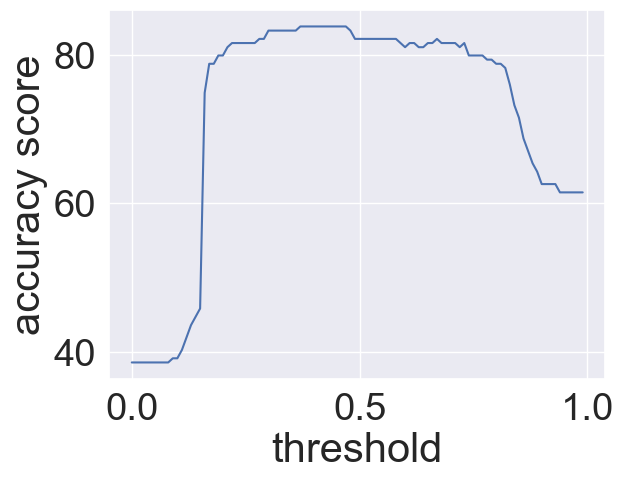

In [89]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [90]:
np.argmax(score_array)

37

## Linear Support Vector Machine(linear-SVM)

In [91]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1, probability=True)

In [92]:
model.fit(train_X, train_Y)

SVC(C=0.1, gamma=0.1, kernel='linear', probability=True)

In [93]:
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.7821229050279329


In [94]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction2 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100*metrics.accuracy_score(prediction2, test_Y)
    print(temp_thres, ': Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 : Accuracy for rbf SVM is 38.55%
0.01 : Accuracy for rbf SVM is 39.11%
0.02 : Accuracy for rbf SVM is 39.11%
0.03 : Accuracy for rbf SVM is 39.11%
0.04 : Accuracy for rbf SVM is 39.11%
0.05 : Accuracy for rbf SVM is 39.11%
0.06 : Accuracy for rbf SVM is 39.11%
0.07 : Accuracy for rbf SVM is 39.11%
0.08 : Accuracy for rbf SVM is 39.11%
0.09 : Accuracy for rbf SVM is 39.66%
0.1 : Accuracy for rbf SVM is 39.66%
0.11 : Accuracy for rbf SVM is 40.22%
0.12 : Accuracy for rbf SVM is 40.78%
0.13 : Accuracy for rbf SVM is 41.34%
0.14 : Accuracy for rbf SVM is 41.90%
0.15 : Accuracy for rbf SVM is 49.72%
0.16 : Accuracy for rbf SVM is 63.13%
0.17 : Accuracy for rbf SVM is 69.27%
0.18 : Accuracy for rbf SVM is 75.98%
0.19 : Accuracy for rbf SVM is 78.21%
0.2 : Accuracy for rbf SVM is 79.33%
0.21 : Accuracy for rbf SVM is 79.89%
0.22 : Accuracy for rbf SVM is 81.01%
0.23 : Accuracy for rbf SVM is 81.56%
0.24 : Accuracy for rbf SVM is 81.56%
0.25 : Accuracy for rbf SVM is 81.56%
0.26 : Accuracy

Text(0, 0.5, 'accuracy score')

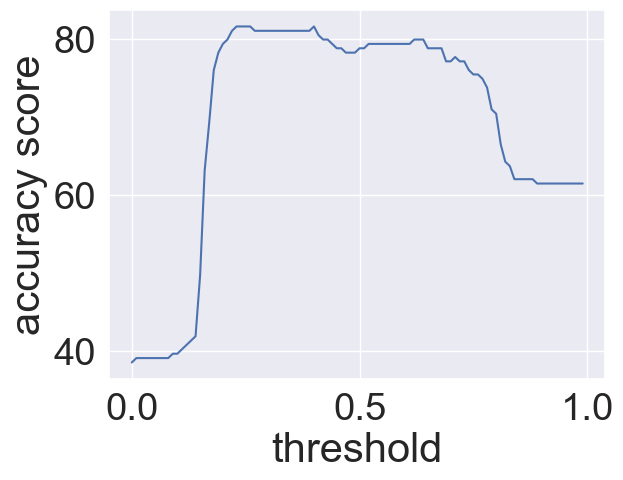

In [95]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [96]:
np.argmax(score_array)

23

## Logistic Regression

In [97]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8044692737430168


In [98]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction3 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100*metrics.accuracy_score(prediction3, test_Y)
    print(temp_thres, ': Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 : Accuracy for rbf SVM is 38.55%
0.01 : Accuracy for rbf SVM is 39.11%
0.02 : Accuracy for rbf SVM is 39.11%
0.03 : Accuracy for rbf SVM is 39.11%
0.04 : Accuracy for rbf SVM is 40.22%
0.05 : Accuracy for rbf SVM is 40.22%
0.06 : Accuracy for rbf SVM is 41.90%
0.07 : Accuracy for rbf SVM is 48.04%
0.08 : Accuracy for rbf SVM is 49.72%
0.09 : Accuracy for rbf SVM is 54.75%
0.1 : Accuracy for rbf SVM is 59.22%
0.11 : Accuracy for rbf SVM is 63.69%
0.12 : Accuracy for rbf SVM is 64.25%
0.13 : Accuracy for rbf SVM is 65.92%
0.14 : Accuracy for rbf SVM is 67.04%
0.15 : Accuracy for rbf SVM is 69.27%
0.16 : Accuracy for rbf SVM is 69.83%
0.17 : Accuracy for rbf SVM is 70.39%
0.18 : Accuracy for rbf SVM is 71.51%
0.19 : Accuracy for rbf SVM is 72.63%
0.2 : Accuracy for rbf SVM is 72.63%
0.21 : Accuracy for rbf SVM is 72.63%
0.22 : Accuracy for rbf SVM is 73.18%
0.23 : Accuracy for rbf SVM is 74.30%
0.24 : Accuracy for rbf SVM is 74.30%
0.25 : Accuracy for rbf SVM is 75.98%
0.26 : Accuracy

Text(0, 0.5, 'accuracy score')

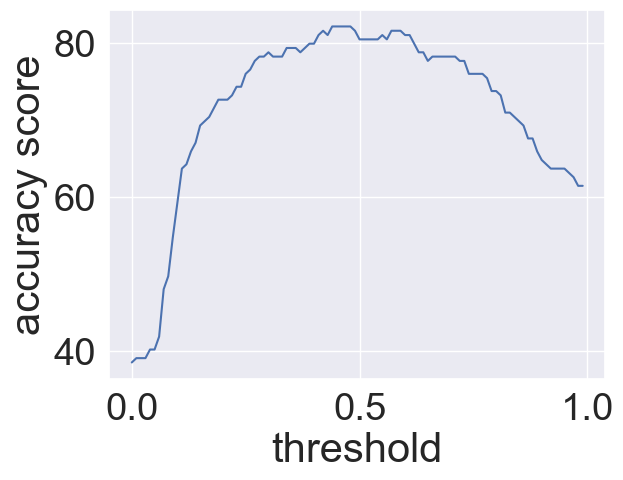

In [99]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [100]:
np.argmax(score_array)

44

## Decision Tree

In [101]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8156424581005587


In [102]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction4 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100*metrics.accuracy_score(prediction4, test_Y)
    print(temp_thres, ': Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 : Accuracy for rbf SVM is 53.63%
0.01 : Accuracy for rbf SVM is 53.63%
0.02 : Accuracy for rbf SVM is 53.63%
0.03 : Accuracy for rbf SVM is 55.31%
0.04 : Accuracy for rbf SVM is 55.31%
0.05 : Accuracy for rbf SVM is 55.31%
0.06 : Accuracy for rbf SVM is 55.31%
0.07 : Accuracy for rbf SVM is 60.89%
0.08 : Accuracy for rbf SVM is 62.57%
0.09 : Accuracy for rbf SVM is 62.57%
0.1 : Accuracy for rbf SVM is 67.04%
0.11 : Accuracy for rbf SVM is 67.04%
0.12 : Accuracy for rbf SVM is 67.04%
0.13 : Accuracy for rbf SVM is 67.04%
0.14 : Accuracy for rbf SVM is 67.04%
0.15 : Accuracy for rbf SVM is 71.51%
0.16 : Accuracy for rbf SVM is 71.51%
0.17 : Accuracy for rbf SVM is 72.07%
0.18 : Accuracy for rbf SVM is 72.07%
0.19 : Accuracy for rbf SVM is 72.07%
0.2 : Accuracy for rbf SVM is 74.86%
0.21 : Accuracy for rbf SVM is 74.86%
0.22 : Accuracy for rbf SVM is 74.86%
0.23 : Accuracy for rbf SVM is 75.42%
0.24 : Accuracy for rbf SVM is 75.42%
0.25 : Accuracy for rbf SVM is 75.98%
0.26 : Accuracy

Text(0, 0.5, 'accuracy score')

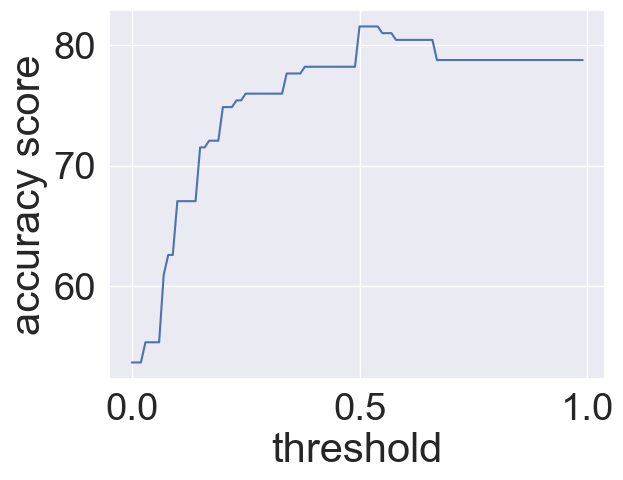

In [103]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [104]:
np.argmax(score_array)

50

## K-Nearest Neighbours(KNN)

In [105]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.7486033519553073


In [106]:
score_array = []


for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction5 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100*metrics.accuracy_score(prediction5, test_Y)
    print(temp_thres, ': Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 : Accuracy for rbf SVM is 54.19%
0.01 : Accuracy for rbf SVM is 54.19%
0.02 : Accuracy for rbf SVM is 54.19%
0.03 : Accuracy for rbf SVM is 54.19%
0.04 : Accuracy for rbf SVM is 54.19%
0.05 : Accuracy for rbf SVM is 54.19%
0.06 : Accuracy for rbf SVM is 54.19%
0.07 : Accuracy for rbf SVM is 54.19%
0.08 : Accuracy for rbf SVM is 54.19%
0.09 : Accuracy for rbf SVM is 54.19%
0.1 : Accuracy for rbf SVM is 54.19%
0.11 : Accuracy for rbf SVM is 54.19%
0.12 : Accuracy for rbf SVM is 54.19%
0.13 : Accuracy for rbf SVM is 54.19%
0.14 : Accuracy for rbf SVM is 54.19%
0.15 : Accuracy for rbf SVM is 54.19%
0.16 : Accuracy for rbf SVM is 54.19%
0.17 : Accuracy for rbf SVM is 54.19%
0.18 : Accuracy for rbf SVM is 54.19%
0.19 : Accuracy for rbf SVM is 54.19%
0.2 : Accuracy for rbf SVM is 74.30%
0.21 : Accuracy for rbf SVM is 74.30%
0.22 : Accuracy for rbf SVM is 74.30%
0.23 : Accuracy for rbf SVM is 74.30%
0.24 : Accuracy for rbf SVM is 74.30%
0.25 : Accuracy for rbf SVM is 74.30%
0.26 : Accuracy

Text(0, 0.5, 'accuracy score')

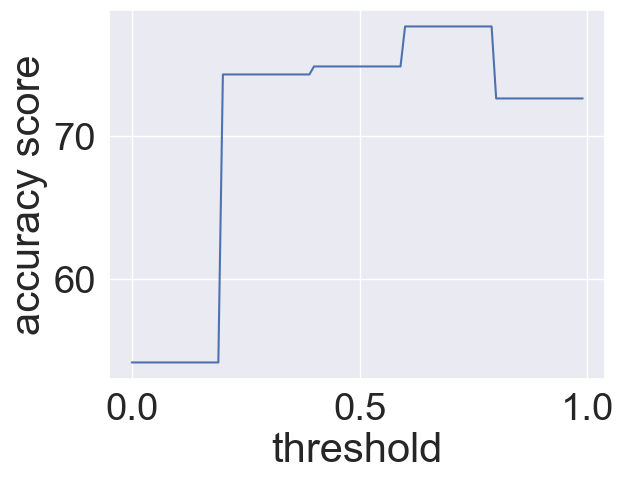

In [107]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [108]:
np.argmax(score_array)

60

- the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5. Lets check the accuracies over various values of n_neighbours.

In [109]:
a_index = list(range(1, 20))
a = pd.Series()
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13,14,15,16,17,18,19]
for i in list(range(1, 20)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
        

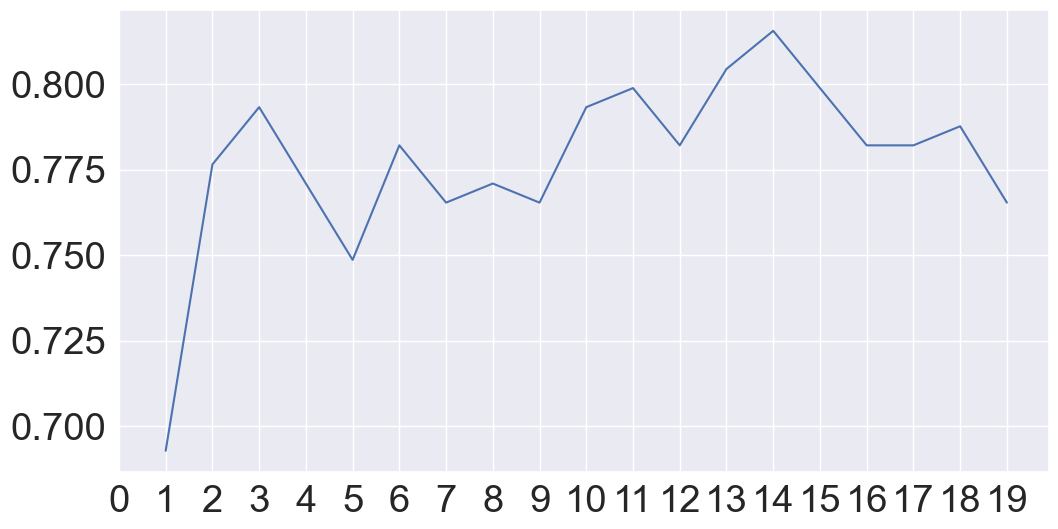

Accuracies for different values of n are: [0.69273743 0.77653631 0.79329609 0.77094972 0.74860335 0.78212291
 0.76536313 0.77094972 0.76536313 0.79329609 0.79888268 0.78212291
 0.80446927 0.81564246 0.79888268 0.78212291 0.78212291 0.7877095
 0.76536313] with the max value as  0.8156424581005587


In [110]:
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## Gaussian Naive Bayes

In [111]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.7877094972067039


## Random Forests

In [112]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8100558659217877


# Cross Validation
- K-Fold Cross Validation 

In [113]:
from sklearn.model_selection import KFold, StratifiedKFold
# KFold: 랜덤하게 나눔, StratifiedKFold :랜덤 + 0과 1의 분포 동일, StratifiedGhuffleKFold: 랜덤+ㅐ0/1+섞는것까지
from sklearn.model_selection import cross_val_score, cross_val_predict  #  교차 검증

In [114]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # KFold 교차 검증 객체를 생성
# 이 객체는 데이터를 10개의 폴드로 나누어서 교차 검증을 수행하도록 설정되며, 데이터를 랜덤하게 섞도록 shuffle 매개변수가 True로 설정되었습니다. 또한, random_state를 42로 설정하여 랜덤 시드를 고정하여 재현 가능한 결과를 얻을 수 있습니다.

In [115]:
xyz = []
accuracy = []
std = []
classifiers=['Linear Svm',   #  각각의 분류 알고리즘들을 리스트로 설정
             'Radial Svm',
             'Logistic Regression',
             'KNN',
             'Decision Tree',
             'Naive Bayes',
             'Random Forest']

In [116]:
models = [svm.SVC(kernel='linear'),   # 해당 알고리즘에 대한 모델 객체를 생성
          svm.SVC(kernel='rbf'),
          LogisticRegression(),
          KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(),
          GaussianNB(),
          RandomForestClassifier(n_estimators=100)]


In [117]:
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy") # cross_val_score 함수를 사용하여 모델을 평가
    xyz.append(cv_result.mean())  # 각 모델의 평균
    std.append(cv_result.std())   # 각 모델의 정확도의 표준 편차
    accuracy.append(cv_result)    #  각 모델의 각 폴드별 정확도
    
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)  # 최종 결과를 pandas의 DataFrame으로 정리하여 출력
# new_models_dataframe2라는 이름의 DataFrame을 생성하고, 각 모델에 대한 평균 정확도와 표준 편차를 해당 알고리즘의 이름(classifiers 리스트에 정의된 이름)을 인덱스로 지정하여 저장
new_models_dataframe2 

,CV Mean,Std
Linear Svm,0.794594,0.054656
Radial Svm,0.826017,0.041586
Logistic Regression,0.802434,0.045404
KNN,0.808115,0.043756
Decision Tree,0.804707,0.041828
Naive Bayes,0.801348,0.030979
Random Forest,0.806941,0.037946


<Axes: >

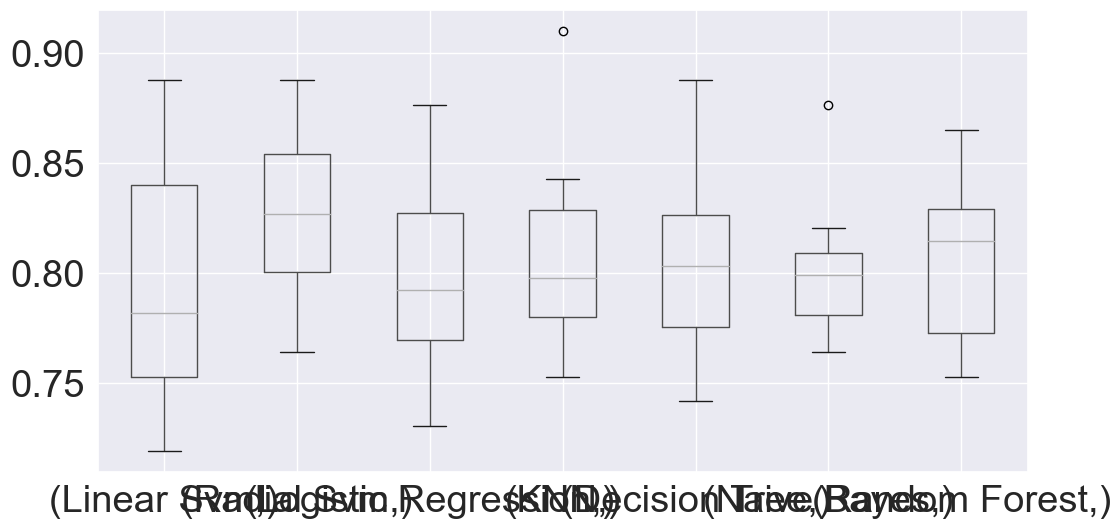

In [118]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

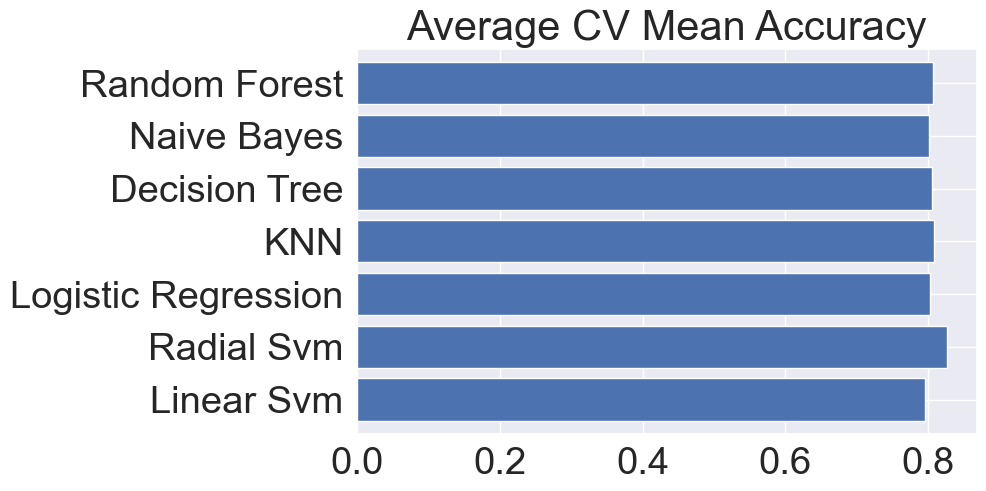

In [119]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Cross Validation summary

In [120]:
from sklearn.model_selection import KFold, StratifiedKFold
# KFold: 랜덤하게 나눔, StratifiedKFold :랜덤 + 0과 1의 분포 동일, StratifiedGhuffleKFold: 랜덤+ㅐ0/1+섞는것까지
from sklearn.model_selection import cross_val_score, cross_val_predict
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
xyz = []
std = []
accuracy = []
classifiers=['Linear Svm',
             'Radial Svm',
             'Logistic Regression',
             'KNN',
             'Decision Tree',
             'Naive Bayes',
             'Random Forest']
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(),
          KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(),
          GaussianNB(),
          RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2 

,CV Mean,Std
Linear Svm,0.794594,0.054656
Radial Svm,0.826017,0.041586
Logistic Regression,0.802434,0.045404
KNN,0.808115,0.043756
Decision Tree,0.799089,0.041629
Naive Bayes,0.801348,0.030979
Random Forest,0.820424,0.028872


# Confusion Matrix

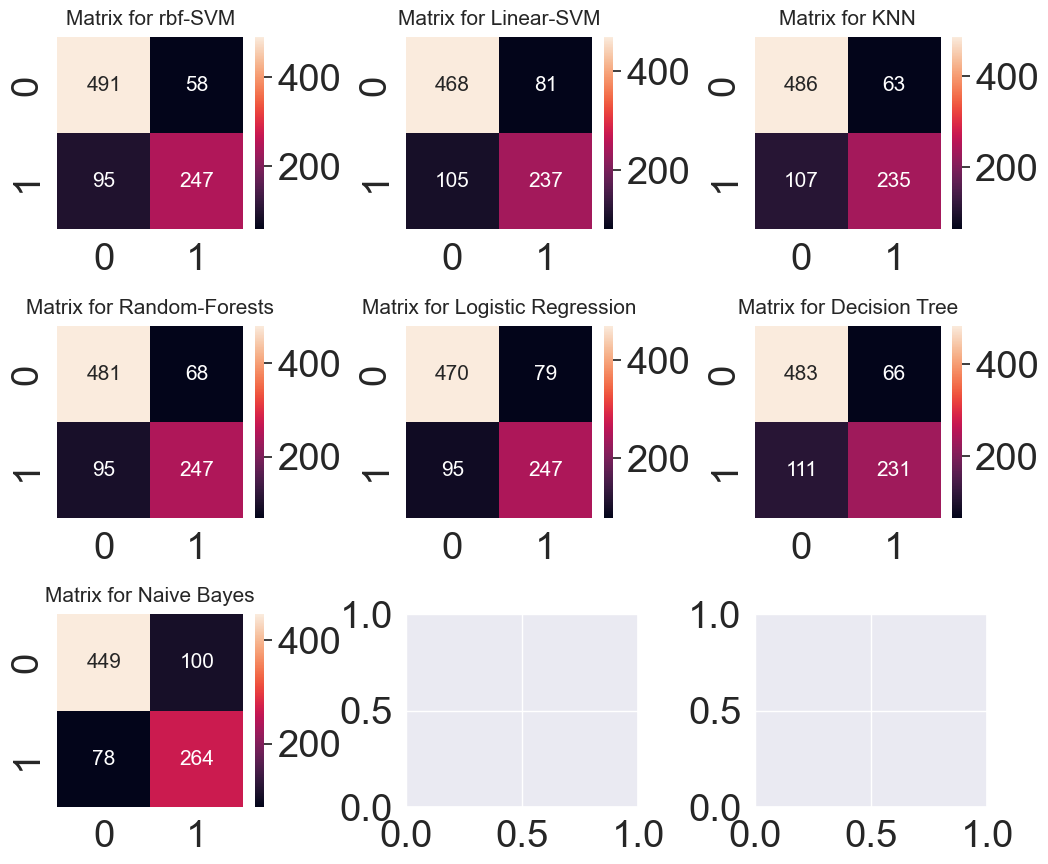

In [121]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='1.0f', annot_kws={'size':15})
ax[0,0].set_title('Matrix for rbf-SVM', y=1.02, size=15)
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f', annot_kws={'size':15})
ax[0,1].set_title('Matrix for Linear-SVM', y=1.02, size=15)
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f', annot_kws={'size':15})
ax[0,2].set_title('Matrix for KNN', y=1.02, size=15)
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f', annot_kws={'size':15})
ax[1,0].set_title('Matrix for Random-Forests', y=1.02, size=15)
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f', annot_kws={'size':15})
ax[1,1].set_title('Matrix for Logistic Regression', y=1.02, size=15)
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f', annot_kws={'size':15})
ax[1,2].set_title('Matrix for Decision Tree', y=1.02, size=15)
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f', annot_kws={'size':15})
ax[2,0].set_title('Matrix for Naive Bayes', y=1.02, size=15)
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Hyper-Parameters Tuning
- Manual tuning
- Gridsearch
- Randomized search
- Baysian optimization

### SVM

In [122]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)

In [123]:
gd.fit(X,Y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7,
                               0.8, 0.9, 1],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0],
                         'kernel': ['rbf', 'linear']},
             verbose=True)

In [124]:
print(gd.best_score_)
print(gd.best_estimator_)

0.8282593685267716
SVC(C=0.4, gamma=0.3)


### Random Forests

In [125]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)

In [126]:
gd.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': range(100, 1000, 100)}, verbose=True)

In [127]:
print(gd.best_score_)
print(gd.best_estimator_)

0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


In [128]:
gd

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': range(100, 1000, 100)}, verbose=True)

In [129]:
gd.best_estimator_

RandomForestClassifier(n_estimators=300, random_state=0)

In [130]:
gd.best_score_

0.819327098110602

In [131]:
best_params = gd.best_estimator_.get_params()
best_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [132]:
model = RandomForestClassifier(**best_params)

In [133]:
model

RandomForestClassifier(n_estimators=300, random_state=0)

## Ensembling
1.Voting Classif\\ier : hard or soft  
2.Bagging  : 부분적으로 나누어서 그들의 예측 데이터의 평균을 가져와서 ..분산이 큰것을 대상으로....  
3.Boosting :전체 학습후 붙여 나가는 것...

#### 1. Voting Classifier

In [134]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.4,gamma=0.3)),
                                              ('RFor',RandomForestClassifier(n_estimators=300,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], voting='soft')
ensemble_lin_rbf.fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8268156424581006
The cross validated score is 0.8238202247191012


#### 2. Bagging

##### Bagged KNN

In [135]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.7988826815642458
The cross validated score for bagged KNN is: 0.8104244694132333


##### Bagged DecisionTree

In [136]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8100558659217877
The cross validated score for bagged Decision Tree is: 0.8171410736579275


#### 3. Boosting

##### AdaBoost(Adaptive Boosting)

In [137]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


##### Stochastic Gradient Boosting

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


##### XGBoost

In [142]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


#### Hyper-Parameter Tuning for AdaBoost

In [150]:
# n_estimators=list(range(100,1100,100))
# learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
# hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
# gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
# gd.fit(X,Y)
# print(gd.best_score_)
# print(gd.best_estimator_)

#### Confusion Matrix for the Best Model

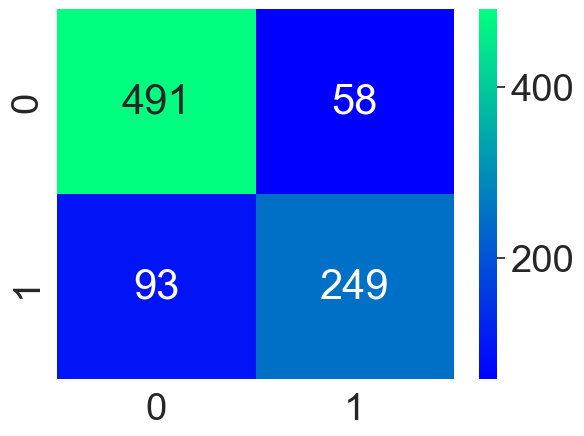

In [153]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

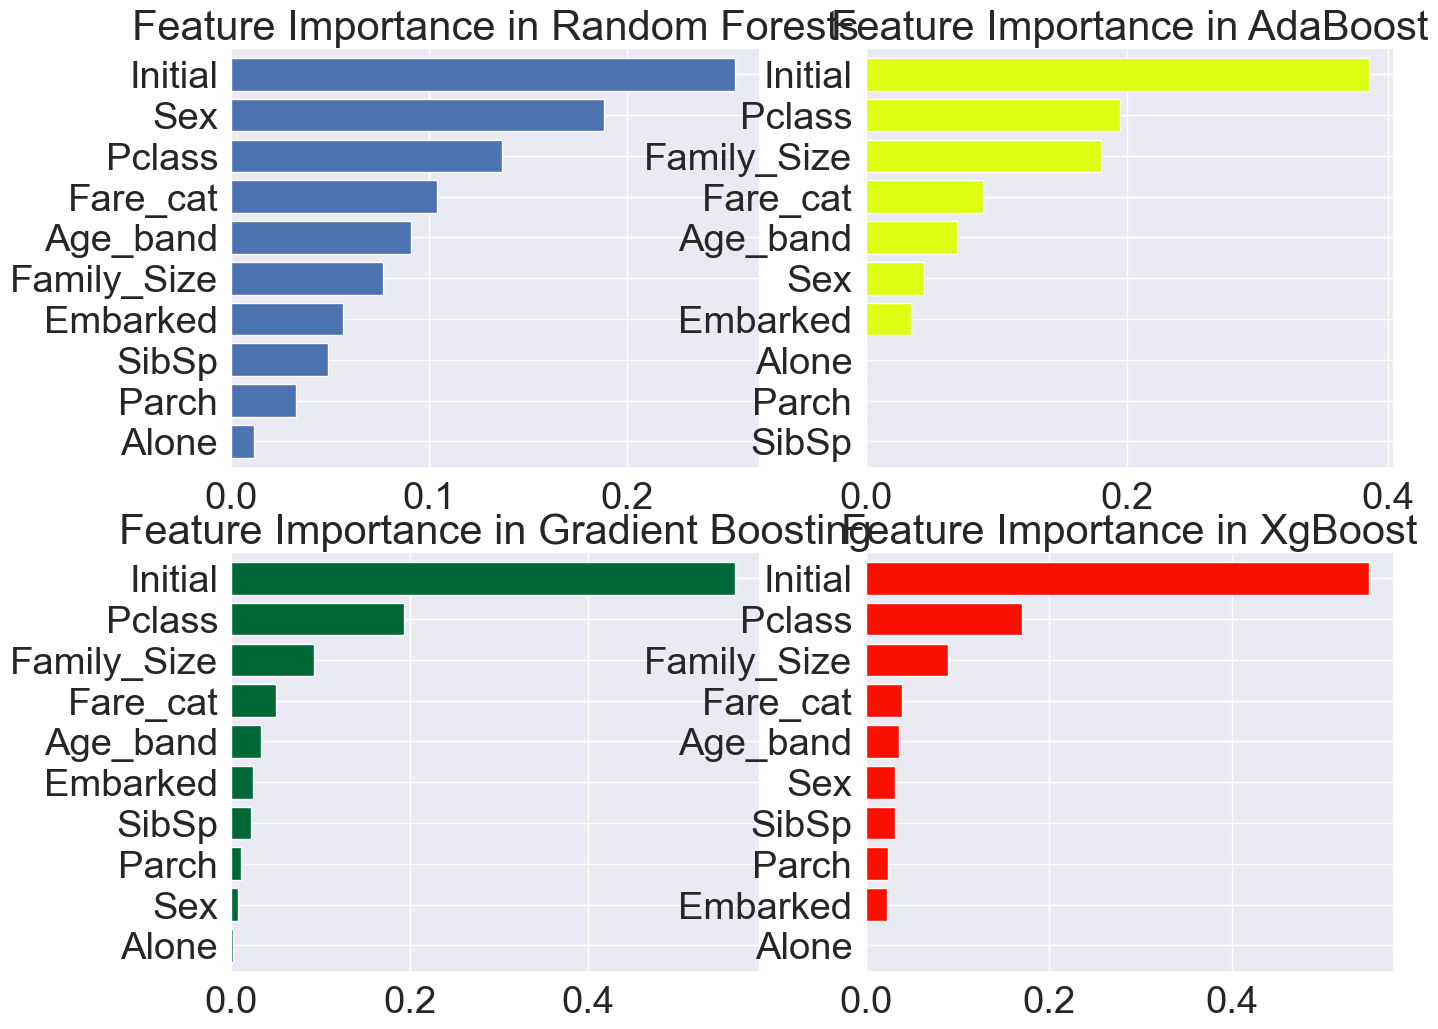

In [152]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

- Feature Importances는 상대적...그래서 보통은 Feature Importance에는 랜덤 포레스트를 사용

1.일반적인 중요한 기능 중 일부는 Initial,Fare_cat,Pclass,Family_Size입니다.  
2.Sex 기능은 중요성을 부여하지 않는 것 같습니다. 이전에 Pclass와 결합된 Sex가 매우 좋은 차별화 요소를 제공한다는 것을 본 것처럼 충격적입니다. 섹스는 RandomForests에서만 중요해 보입니다.
그러나 우리는 많은 분류기에서 최상위에 있는 이니셜 기능을 볼 수 있습니다. 우리는 이미 Sex와 이니셜 사이의 양의 상관 관계를 보았으므로 둘 다 성별을 나타냅니다.  
3.마찬가지로 Pclass 및 Fare_cat은 Alone, Parch 및 SibSp와 함께 승객 및 Family_Size의 상태를 나타냅니다.